In [2]:
%load_ext autoreload
%autoreload 2
import os.path as op
import tempfile

import matplotlib.pyplot as plt


import hnn_core
from hnn_core import simulate_dipole, jones_2009_model
from hnn_core.viz import plot_dipole


import sys
sys.path.append('../code/')

from summary_features.calculate_summary_features import calculate_summary_stats, calculate_summary_statistics_alternative

import numpy as np
import torch

# visualization
import matplotlib as mpl
import matplotlib.pyplot as plt

# sbi
from sbi import utils as utils
from sbi import analysis as analysis
from sbi.inference.base import infer
from sbi.inference import SNPE, prepare_for_sbi, simulate_for_sbi

In [3]:
## defining neuronal network model

from utils.simulation_wrapper import event_seed, set_network_default

net = set_network_default()

In [4]:
net._params

{
    "L2Basket_Gauss_A_weight": 0.0,
    "L2Basket_Gauss_mu": 2000.0,
    "L2Basket_Gauss_sigma": 3.6,
    "L2Basket_Pois_A_weight_ampa": 0.0,
    "L2Basket_Pois_A_weight_nmda": 0.0,
    "L2Basket_Pois_lamtha": 0.0,
    "L2Pyr_Gauss_A_weight": 0.0,
    "L2Pyr_Gauss_mu": 2000.0,
    "L2Pyr_Gauss_sigma": 3.6,
    "L2Pyr_Pois_A_weight_ampa": 0.0,
    "L2Pyr_Pois_A_weight_nmda": 0.0,
    "L2Pyr_Pois_lamtha": 0.0,
    "L2Pyr_ampa_e": 0.0,
    "L2Pyr_ampa_tau1": 0.5,
    "L2Pyr_ampa_tau2": 5.0,
    "L2Pyr_apical1_L": 306.0,
    "L2Pyr_apical1_diam": 4.08,
    "L2Pyr_apicaloblique_L": 340.0,
    "L2Pyr_apicaloblique_diam": 3.91,
    "L2Pyr_apicaltrunk_L": 59.5,
    "L2Pyr_apicaltrunk_diam": 4.25,
    "L2Pyr_apicaltuft_L": 238.0,
    "L2Pyr_apicaltuft_diam": 3.4,
    "L2Pyr_basal1_L": 85.0,
    "L2Pyr_basal1_diam": 4.25,
    "L2Pyr_basal2_L": 255.0,
    "L2Pyr_basal2_diam": 2.72,
    "L2Pyr_basal3_L": 255.0,
    "L2Pyr_basal3_diam": 2.72,
    "L2Pyr_dend_Ra": 200.0,
    "L2Pyr_dend_cm": 0.619

In [32]:
window_len = 30
prior_min = [43.8, 89.49]   # 't_evdist_1', 'sigma_t_evdist_1', 't_evprox_2', 'sigma_t_evprox_2'

prior_max = [79.9, 152.96]  

prior = utils.torchutils.BoxUniform(low=prior_min, 
                                    high=prior_max)

number_simulations = 500
density_estimator = 'nsf'

In [ ]:
from utils import inference
from utils.simulation_wrapper import event_seed, simulation_wrapper

posterior, theta, x = inference.run_sim_inference(prior, simulation_wrapper, number_simulations, density_estimator=density_estimator, num_workers=6)

window_len, scaling_factor = 30, 3000



joblib will run over 1 jobs
joblib will run over 1 jobs
Building the NEURON model
[Done]
running trial 1 on 1 cores
Simulation time: 0.03 ms...
Simulation time: 10.0 ms...
Simulation time: 20.0 ms...
Simulation time: 30.0 ms...
Simulation time: 40.0 ms...
Simulation time: 50.0 ms...
Simulation time: 60.0 ms...
Simulation time: 70.0 ms...
Simulation time: 80.0 ms...
Simulation time: 90.0 ms...
Simulation time: 100.0 ms...
Simulation time: 110.0 ms...
Simulation time: 120.0 ms...
Simulation time: 130.0 ms...
Simulation time: 140.0 ms...
Simulation time: 150.0 ms...
Simulation time: 160.0 ms...


Running 500 simulations in 500 batches.:   0%|          | 0/500 [00:00<?, ?it/s]

In [9]:
window_len, scaling_factor = 30, 3000



param_real = torch.tensor([[63.53, 137.12]])
s_real = inference.run_only_sim(param_real)


joblib will run over 1 jobs
Building the NEURON model
[Done]
running trial 1 on 1 cores
Simulation time: 0.03 ms...
Simulation time: 10.0 ms...
Simulation time: 20.0 ms...
Simulation time: 30.0 ms...
Simulation time: 40.0 ms...
Simulation time: 50.0 ms...
Simulation time: 60.0 ms...
Simulation time: 70.0 ms...
Simulation time: 80.0 ms...
Simulation time: 90.0 ms...
Simulation time: 100.0 ms...
Simulation time: 110.0 ms...
Simulation time: 120.0 ms...
Simulation time: 130.0 ms...
Simulation time: 140.0 ms...
Simulation time: 150.0 ms...
Simulation time: 160.0 ms...


18


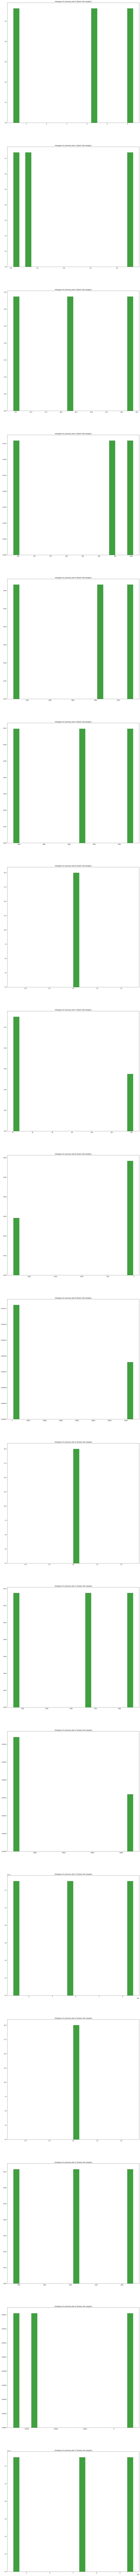

In [31]:

import seaborn as sns
import matplotlib.gridspec as gridspec

fig = plt.figure(figsize=(20,400))

gs = gridspec.GridSpec(nrows=x.size(dim=1), ncols=1)

print(x.size(dim=1))
x.size(dim=0)


for i in range(x.size(dim=1)):
    
    globals()['ax%s' % i] = fig.add_subplot(gs[i])

    globals()['sum_stats%s' % i] = []

    for j in range(x.size(dim=0)):
        globals()['sum_stats%s' % i].append(x[j][i])



    globals()['ax%s' % i].hist(globals()['sum_stats%s' % i], bins=20, density=True, facecolor='g', alpha=0.75, histtype='barstacked')
    globals()['ax%s' % i].set_title('Histogram of summary stat {} (drawn 100 samples)'.format(i))
    #ax0.set(ylim=(-500, 7000))


    #globals()['ax%s' % i].axvline(s_real[0][i], color='red')




plt.savefig('Histograms.png')

In [41]:
samples = posterior.sample((100,), 
                           x=s_real[0])data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAABIEAAFUfCAYAAAAB+BvxAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjMuNCwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy8QVMy6AAAACXBIWXMAAAsTAAALEwEAmpwYAAEAAElEQVR4nOzdebBtaV3e8eenIA5N00h3FHDooBgBlTijloBlyqAJhcbEiBrEGElEjZqBqIWIojEaUTHigEoAMQQhhmASoykVcEAR4kSDERy6mtCM9kAzKMObP9a6cvr0Offcbk57m34+n6pbt/dZa+/9rnfve+vub79r7VlrBQAAAIBbt/c43wMAAAAA4OYnAgEAAAAUEIEAAAAACohAAAAAAAVEIAAAAIACIhAAAABAAREIgFu9mblsZu5/vsdxPs3M583MFTNz3cx87PkeD2c3M7ebmZfMzAces/2hM/Orf9Xj4p1m5tKZWTNzm3fhMW43M38wM3/tNMcGAMcRgQB4tzYzfzozf+vQz673AXmtda+11nNOeJx3+QPdLdz3JPnqtdYFa63fPt+DuSWbmSfNzLffiP1PDDL7h/0nzsy1M/OqmfkXJzzsw5I8b631qnMdxy3BzDxhZv7vzLxjZh56xPav34//mn0+bndg2/vPzH+dmTfOzOUz80V/pYM/D9Zaf57kiUn+zfkeCwAdRCAA+CtwC4hLH5rksvM8hpvNLWB+T/LoJHfP9jp8RpJHzMwDzrL/P03ykzflic7zXPxukocn+T+HN8zM307yDUk+M8mlSe6W5FsP7PL4JH+R5AOSfHGSH56Ze93M470l+E9JvvRgEAOAm4sIBMCt3sHVQjPzSTPzwn1Fxqtn5nv33Z63/371fsrUp8zMe8zMI/dVCa+ZmafMzB0OPO5D9m2vn5lvPvQ8j56ZZ87MU2fm2iQP3Z/7+TNz9cxcOTM/ODPvdeDx1sw8fGZeNjNvmJnHzMyH7fe5dmZ++uD+h47xyLHuK1CuS/KeSX53Zv7oiPvOzHzffr9rZub3Zuaj9m3PmZl/cmDf6616uTFjnpn7z8wrZuYR+3NdOTOfOzOfMzN/ODN/NjPfdOCxz2W+vmpmXpbkZTPz+Jl57KFj+9mZ+bpzPeaZeVi2APGI/X3ws/v+3zAzf7Qf40tm5vP2n98jyY8k+ZR9/6uPen2SPCTJY9ZaV621Xprkx5I89JjX8kOSfFiS3zzwszvNzLP3OX3Bvv3gfa43F/vPHjfbKYDXzsyLZubT95+/98y8eWYu3m8/cmbeNjMX7re/fWa+f//vJ+3z+j/2Y//Nmbnecx+01nr8WusXk7zliM1fmuQn1lqXrbWuSvKYM3MwM++X5POTfPNa67q11q8meXaSf3TMHH34zDx3f+1eNzNPP7DtyOPetz16Zp4x25/LN8zM78/MR8zMN+7vhStm5rMO7P+cmfnOmXnB/lz/bWbe/5gx3WFmfmJ/r/6/fR7f86TxrrVekeSqJPc5bl4B4LSIQAC0eVySx621Lsz2Qfqn95/fd//9ov2Uqedn+4D60GwrN+6W5IIkP5gkM3PPJD+ULRjcOckdktz10HM9KMkzk1yU5KeSvD3J1ye5OMmnZFsR8fBD93lAko/P9oHwEUmesD/HByf5qCQPPua4jhzrWuvP11oX7Pvce6111Af4z9qP/yP2sf7DJK8/5nmOcmPG/IFJ3jvbXD0qWwz5kv3+n57kUTNzt33fc5mvz03yyUnumeTJSR48M++RJHvk+MwkTzvXY15rPSHba/Xd+/vggfv+f7SP7w7ZVq88dWbuvAedf5bk+fv+Fx1+opm5Y5K7ZFslc8bvJjlulctHJ/njtdbbDvzs8dnCyp2T/OP912EH5yJJfivJ30zy/tlWmzxjZt57rfWWfdv99v3um+TyJJ924PZzDzzug/djvmOSlyf5jmPGfZJ75YZz8AEzc6dsr8Pb11p/eGj7cXP0mCS/sI/pg5L8hwPbjjzuA9sfmG2V1R2T/HaSn8/2b+K7Jvm2JD966Lkekm2+75LkbUl+4JgxPXnf/uFJPjbbe+xMQD3beJPkpUnufczjAsCpEYEAuDV41r5a5Op9JcYPnWXftyb58Jm5eF9x8Btn2feLk3zvWuuP11rXJfnGJF842+k2fz/Jz661fnWt9RfZgsY6dP/nr7WetdZ6x1rrzWutF621fmOt9ba11p9m+7B5v0P3+a611rVrrcuSvDjJL+zPf02Sn8v24fLGjvUkb01y+yQfmWTWWi9da115Dve7KWN+a5LvWGu9Ncl/zhZ4HrfWesN+/8uSfEySnON8feda68/2+X1BkmuyhZ8k+cIkz1lrvfpdPea11jPWWq/cX8unZ1tt80nnOD9nItw1B352zf78R7koyRvO3NhXk3x+kkettd641npxtuBw2F/OxT7mp661Xr/P32OT3C7J39j3fW6S++3vj4/JFjbut8eST0zyKwce92fWWi/Yo9RPZQssN8UFueEcJNs8HN52Zvtxc/TWbKfW3WWt9ZZ95VCSE487SX5lrfXz+/E8I8klSf7dgffkpTNz0YH9f3Kt9eK11huTfHOSLzizwueMmfmAJJ+d5Ov21+g1Sb4v23vwrOPdvSHb6w4ANysRCIBbg89da1105lduuFrkoC/PturgD2bmt2bm755l37tkWyFxxuVJbpPtmiV3SXLFmQ1rrTflhqtnrjh4Yz/t5L/PdmHca5P822wR5KCDweLNR9y+IEc721jPaq31S9lWOD0+yatnu7jvhSfd7yaO+fVrrbcf2HbU/S9Iznm+rjh0+8nZVhZl//3I6+rc2GOe7dS/3zkQGj/qiLEc57r994OPf2EOhJ5Drsr148cl2V7Lg8d6eW7o8PvtX87MS/dTkK7OtorpzJifm+T+ST4uye8n+d/ZAtt9krx8rfW6Aw918OLUb8rx78GTXJcbzkGyzcPhbWe2HzdHj0gySV4w27f//eXKqBOOO7nh++11R7wnDx7j4Xm/bW742n/o/vMrD7xHfjTJmW/9Ona8u9snufqYYwWAUyMCAVBlrfWytdaDs304+64kz9yvR3J4FU+SvDLbh7szPiTb6R6vTnJlttM6kiQz8z5J7nT46Q7d/uEkf5Dk7vvpaN+U7YPhaTjbWE+01vqBtdbHZzv95iOS/Ot90xuTvO+BXY/8yvKbybnM1+E5fmqSB83MvZPcI8mzjnvwsxzz9R5zZj4022lrX53kTntofPGBsRz13jn4PFdle78cPN3n3jn+Qt2/l+RuB1ZxvTbba/nBB/b5kKOe6sCYPz3bN059QZI77mO+5sCYfz3b6pjPS/LctdZL9sf8O7n+qWCn6bLccA5evdZ6fZI/THKbmbn7oe1HztFa61Vrra9Ya90l20W0f2i/7s5Jx31THJ73tyZ53aF9rkjy50kuPhCkL1xr3ets4z1w/3vk+qfKAcDNQgQCoMrMfMnMXLLWekfe+X/e357tg/Y7sl1P54ynJfn6mfnrM3NBtpUoT99PI3lmkgfOzKfOdrHib83JHzRvn+TaJNfNzEcm+crTOq4TxnpWM/OJM/PJM3PbbNHnLdnmJEl+J8nfm5n33T+0fvkpjvkkN3q+9ovs/la2FUD/5cypUYedcMyvzvXfB2ci4Wv3+35ZtpVAObD/B80xF+3ePSXJI2fmjvuxfEWSJ53lGP7ydLN9lcrPJHn0/jrcM9tFls/m9tnC0WuzxZVH5cBKm33l2ouSfFXeGX1+PVuguMkRaGbeaz+lbJLcdraLUJ/59+ZTknz5zNxzv07SI7PPwX6q1c8k+baZeb+Z+bRs19Q6ciXXzPyDmTkTYa/K9vq8/aTjvom+ZB/z+2a7ZtAzD6wcyj7+K7Nd8+exM3PhbBdq/7CZud8J483M3DXb9YvOdmoqAJwKEQiANg9Ictls35j1uCRfuF+j403ZLnj7a/vpHPdJ8sRsH0Kfl+RPsoWCr0mS/fo1X5PtGiJXZjtt5TXZVgMc518l+aJ93x9L8vSz7HtjHTvWc3DhPp6rsp3u8vok37Nv+75sX9v96mynWv3U6Q35RDd1vp6c7eLKZ/uK9bMd808kuef+PnjWvkrmsUmen20ePjrJrx14rF/KtmLlVTNzeIXIGd+S7eLSl2eLLP9+rfW/zjK+H831vxnrq7OdovSqbOHkP57lvsl2seOfy7bC5vJs74fDp849N9spTC84cPv2eec35d0Uv5DtlKpPzXaB8Ddnv+j6frzfneSX9zFdnm1eznh4kvfJ9ufoaUm+cv9zdpRPTPKb+5/jZyf52rXWn+TcjvvG+slsc/6qbBc1/+fH7PeQJO+V5CXZ3lfPzHYh77ONN9ne409ea53t7w4AOBWz1llXMAMA52BffXN1tlOX/uSE3bkZzcx9s50Wdum+4uvdzszcLts3V33mjbxIN6doZp6T5KlrrR+/mR7/dtlOA7vvfjFpALhZncs3hgAAR5iZByb5xWynvnxPtgvs/un5HFO7/fSur03y4++uAShJ9lUh9zxxR96t7a/zR57vcQDQw+lgAHDTPSjbBZlfmeTu2U4ts8T2PJmZe2RbjXXnJN9/XgcDAHAL5HQwAAAAgAJWAgEAAAAUEIEAAAAACpy3C0NffPHF69JLLz1fTw8AAABwq/OiF73odWutS47adt4i0KWXXpoXvvCF5+vpAQAAAG51Zuby47Y5HQwAAACggAgEAAAAUEAEAgAAACggAgEAAAAUEIEAAAAACohAAAAAAAVEIAAAAIACIhAAAABAAREIAAAAoIAIBAAAAFBABAIAAAAoIAIBAAAAFBCBAAAAAAqIQAAAAAAFRCAAAACAAiIQAAAAQAERCAAAAKCACAQAAABQQAQCAAAAKCACAQAAABQQgQAAAAAKiEAAAAAABUQgAAAAgAIiEAAAAEABEQgAAACggAgEAAAAUEAEAgAAACggAgEAAAAUEIEAAAAACohAAAAAAAVEIAAAAIACIhAAAABAAREIAAAAoIAIBAAAAFBABAIAAAAoIAIBAAAAFBCBAAAAAAqIQAAAAAAFRCAAAACAAiIQAAAAQAERCAAAAKCACAQAAABQQAQCAAAAKCACAQAAABQQgQAAAAAKiEAAAAAABUQgAAAAgAIiEAAAAEABEQgAAACggAgEAAAAUEAEAgAAACggAgEAAAAUEIEAAAAACohAAAAAAAVEIAAAAIACIhAAAABAAREIAAAAoIAIBAAAAFBABAIAAAAoIAIBAAAAFBCBAAAAAAqIQAAAAAAFRCAAAACAAiIQAAAAQAERCAAAAKCACAQAAABQQAQCAAAAKCACAQAAABQQgQAAAAAKiEAAAAAABUQgAAAAgAIiEAAAAEABEQgAAACggAgEAAAAUEAEAgAAACggAgEAAAAUEIEAAAAACohAAAAAAAVEIAAAAIACIhAAAABAAREIAAAAoIAIBAAAAFBABAIAAAAoIAIBAAAAFBCBAAAAAAqIQAAAAAAFRCAAAACAAiIQAAAAQAERCAAAAKCACAQAAABQQAQCAAAAKCACAQAAABQQgQAAAAAKiEAAAAAABUQgAAAAgAIiEAAAAEABEQgAAACggAgEAAAAUEAEAgAAACggAgEAAAAUEIEAAAAACohAAAAAAAVEIAAAAIACIhAAAABAAREIAAAAoIAIBAAAAFBABAIAAAAoIAIBAAAAFBCBAAAAAAqIQAAAAAAFRCAAAACAAiIQAAAAQAERCAAAAKCACAQAAABQQAQCAAAAKCACAQAAABQQgQAAAAAKiEAAAAAABUQgAAAAgAIiEAAAAEABEQgAAACggAgEAAAAUEAEAgAAACggAgEAAAAUEIEAAAAACohAAAAAAAVEIAAAAIACIhAAAABAAREIAAAAoIAIBAAAAFBABAIAAAAoIAIBAAAAFBCBAAAAAAqIQAAAAAAFRCAAAACAAiIQAAAAQAERCAAAAKCACAQAAABQQAQCAAAAKCACAQAAABQQgQAAAAAKiEAAAAAABUQgAAAAgAIiEAAAAEABEQgAAACggAgEAAAAUEAEAgAAACggAgEAAAAUEIEAAAAACohAAAAAAAVEIAAAAIACIhAAAABAAREIAAAAoIAIBAAAAFBABAIAAAAoIAIBAAAAFBCBAAAAAAqIQAAAAAAFRCAAAACAAiIQAAAAQAERCAAAAKCACAQAAABQQAQCAAAAKCACAQAAABQQgQAAAAAKiEAAAAAABUQgAAAAgAIiEAAAAEABEQgAAACggAgEAAAAUEAEAgAAACggAgEAAAAUEIEAAAAACohAAAAAAAVEIAAAAIACIhAAAABAAREIAAAAoIAIBAAAAFBABAIAAAAoIAIBAAAAFBCBAAAAAAqIQAAAAAAFRCAAAACAAiIQAAAAQAERCAAAAKCACAQAAABQQAQCAAAAKCACAQAAABQQgQAAAAAKiEAAAAAABUQgAAAAgAIiEAAAAEABEQgAAACggAgEAAAAUEAEAgAAACggAgEAAAAUEIEAAAAACohAAAAAAAVEIAAAAIACIhAAAABAAREIAAAAoIAIBAAAAFBABAIAAAAoIAIBAAAAFBCBAAAAAAqIQAAAAAAFRCAAAACAAiIQAAAAQAERCAAAAKCACAQAAABQQAQCAAAAKCACAQAAABQQgQAAAAAKiEAAAAAABUQgAAAAgAIiEAAAAEABEQgAAACggAgEAAAAUEAEAgAAACggAgEAAAAUEIEAAAAACohAAAAAAAVEIAAAAIACIhAAAABAAREIAAAAoIAIBAAAAFBABAIAAAAoIAIBAAAAFBCBAAAAAAqIQAAAAAAFRCAAAACAAiIQAAAAQAERCAAAAKCACAQAAABQQAQCAAAAKCACAQAAABQQgQAAAAAKiEAAAAAABUQgAAAAgAIiEAAAAEABEQgAAACggAgEAAAAUEAEAgAAACggAgEAAAAUEIEAAAAACohAAAAAAAVEIAAAAIACIhAAAABAAREIAAAAoIAIBAAAAFBABAIAAAAoIAIBAAAAFBCBAAAAAAqIQAAAAAAFRCAAAACAAiIQAAAAQAERCAAAAKCACAQAAABQQAQCAAAAKCACAQAAABQQgQAAAAAKiEAAAAAABUQgAAAAgAIiEAAAAEABEQgAAACggAgEAAAAUEAEAgAAACggAgEAAAAUEIEAAAAACohAAAAAAAVEIAAAAIACIhAAAABAAREIAAAAoIAIBAAAAFBABAIAAAAoIAIBAAAAFBCBAAAAAAqIQAAAAAAFRCAAAACAAiIQAAAAQAERCAAAAKCACAQAAABQQAQCAAAAKCACAQAAABQQgQAAAAAKiEAAAAAABUQgAAAAgAIiEAAAAEABEQgAAACggAgEAAAAUEAEAgAAACggAgEAAAAUEIEAAAAACohAAAAAAAVEIAAAAIACIhAAAABAAREIAAAAoIAIBAAAAFBABAIAAAAoIAIBAAAAFBCBAAAAAAqIQAAAAAAFRCAAAACAAiIQAAAAQAERCAAAAKCACAQAAABQQAQCAAAAKCACAQAAABQQgQAAAAAKiEAAAAAABUQgAAAAgAIiEAAAAEABEQgAAACggAgEAAAAUEAEAgAAACggAgEAAAAUEIEAAAAACohAAAAAAAVEIAAAAIACIhAAAABAAREIAAAAoIAIBAAAAFBABAIAAAAoIAIBAAAAFBCBAAAAAAqIQAAAAAAFRCAAAACAAiIQAAAAQAERCAAAAKCACAQAAABQQAQCAAAAKCACAQAAABQQgQAAAAAKiEAAAAAABUQgAAAAgAIiEAAAAEABEQgAAACggAgEAAAAUEAEAgAAACggAgEAAAAUEIEAAAAACohAAAAAAAVEIAAAAIACIhAAAABAAREIAAAAoIAIBAAAAFBABAIAAAAoIAIBAAAAFBCBAAAAAAqIQAAAAAAFRCAAAACAAiIQAAAAQAERCAAAAKCACAQAAABQQAQCAAAAKCACAQAAABQQgQAAAAAKiEAAAAAABUQgAAAAgAIiEAAAAEABEQgAAACggAgEAAAAUEAEAgAAACggAgEAAAAUEIEAAAAACohAAAAAAAVEIAAAAIACIhAAAABAAREIAAAAoIAIBAAAAFBABAIAAAAoIAIBAAAAFBCBAAAAAAqIQAAAAAAFRCAAAACAAiIQAAAAQAERCAAAAKCACAQAAABQQAQCAAAAKCACAQAAABQQgQAAAAAKiEAAAAAABUQgAAAAgAIiEAAAAEABEQgAAACggAgEAAAAUEAEAgAAACggAgEAAAAUEIEAAAAACohAAAAAAAVEIAAAAIACIhAAAABAAREIAAAAoIAIBAAAAFBABAIAAAAoIAIBAAAAFBCBAAAAAAqIQAAAAAAFRCAAAACAAiIQAAAAQAERCAAAAKCACAQAAABQQAQCAAAAKCACAQAAABQQgQAAAAAKiEAAAAAABUQgAAAAgAIiEAAAAEABEQgAAACggAgEAAAAUEAEAgAAACggAgEAAAAUEIEAAAAACohAAAAAAAVEIAAAAIACIhAAAABAAREIAAAAoIAIBAAAAFBABAIAAAAoIAIBAAAAFBCBAAAAAAqIQAAAAAAFRCAAAACAAiIQAAAAQAERCAAAAKCACAQAAABQQAQCAAAAKCACAQAAABQQgQAAAAAKiEAAAAAABUQgAAAAgAIiEAAAAEABEQgAAACggAgEAAAAUEAEAgAAACggAgEAAAAUEIEAAAAACohAAAAAAAVEIAAAAIACIhAAAABAAREIAAAAoIAIBAAAAFBABAIAAAAoIAIBAAAAFBCBAAAAAAqIQAAAAAAFRCAAAACAAiIQAAAAQAERCAAAAKCACAQAAABQQAQCAAAAKCACAQAAABQQgQAAAAAKiEAAAAAABUQgAAAAgAIiEAAAAEABEQgAAACggAgEAAAAUEAEAgAAACggAgEAAAAUEIEAAAAACohAAAAAAAVEIAAAAIACIhAAAABAAREIAAAAoIAIBAAAAFBABAIAAAAoIAIBAAAAFLjN+R7ArcFnPPkzzvcQTs0vf+kvn+8hAABU8W9J4N3ZreXvsJa/v6wEAgAAACggAgEAAAAUEIEAAAAACohAAAAAAAVEIAAAAIACIhAAAABAAREIAAAAoIAIBAAAAFBABAIAAAAoIAIBAAAAFBCBAAAAAAqIQAAAAAAFRCAAAACAAiIQAAAAQAERCAAAAKCACAQAAABQQAQCAAAAKCACAQAAABQQgQAAAAAKiEAAAAAABUQgAAAAgAIiEAAAAEABEQgAAACggAgEAAAAUEAEAgAAACggAgEAAAAUEIEAAAAACohAAAAAAAVEIAAAAIACIhAAAABAAREIAAAAoIAIBAAAAFBABAIAAAAoIAIBAAAAFBCBAAAAAAqIQAAAAAAFRCAAAACAAiIQAAAAQAERCAAAAKCACAQAAABQQAQCAAAAKCACAQAAABQQgQAAAAAKiEAAAAAABUQgAAAAgAIiEAAAAEABEQgAAACggAgEAAAAUEAEAgAAACggAgEAAAAUEIEAAAAACohAAAAAAAVEIAAAAIACIhAAAABAAREIAAAAoIAIBAAAAFBABAIAAAAoIAIBAAAAFBCBAAAAAAqIQAAAAAAFRCAAAACAAiIQAAAAQAERCAAAAKCACAQAAABQQAQCAAAAKCACAQAAABQQgQAAAAAKiEAAAAAABUQgAAAAgAIiEAAAAEABEQgAAACggAgEAAAAUEAEAgAAACggAgEAAAAUEIEAAAAACohAAAAAAAVEIAAAAIACIhAAAABAAREIAAAAoIAIBAAAAFBABAIAAAAoIAIBAAAAFBCBAAAAAAqIQAAAAAAFRCAAAACAAiIQAAAAQAERCAAAAKCACAQAAABQQAQCAAAAKCACAQAAABQQgQAAAAAKiEAAAAAABUQgAAAAgAIiEAAAAEABEQgAAACggAgEAAAAUEAEAgAAACggAgEAAAAUEIEAAAAACohAAAAAAAVEIAAAAIACIhAAAABAAREIAAAAoIAIBAAAAFBABAIAAAAoIAIBAAAAFBCBAAAAAAqIQAAAAAAFRCAAAACAAiIQAAAAQAERCAAAAKCACAQAAABQQAQCAAAAKCACAQAAABQQgQAAAAAKiEAAAAAABUQgAAAAgAIiEAAAAEABEQgAAACggAgEAAAAUEAEAgAAACggAgEAAAAUEIEAAAAACohAAAAAAAVEIAAAAIACIhAAAABAAREIAAAAoIAIBAAAAFBABAIAAAAoIAIBAAAAFBCBAAAAAAqIQAAAAAAFRCAAAACAAiIQAAAAQAERCAAAAKCACAQAAABQQAQCAAAAKCACAQAAABQQgQAAAAAKiEAAAAAABUQgAAAAgAIiEAAAAEABEQgAAACggAgEAAAAUEAEAgAAACggAgEAAAAUEIEAAAAACohAAAAAAAVEIAAAAIACIhAAAABAAREIAAAAoIAIBAAAAFBABAIAAAAoIAIBAAAAFBCBAAAAAAqIQAAAAAAFRCAAAACAAiIQAAAAQAERCAAAAKCACAQAAABQQAQCAAAAKCACAQAAABQQgQAAAAAKiEAAAAAABUQgAAAAgAIiEAAAAEABEQgAAACggAgEAAAAUEAEAgAAACggAgEAAAAUEIEAAAAACohAAAAAAAVEIAAAAIACIhAAAABAAREIAAAAoIAIBAAAAFBABAIAAAAoIAIBAAAAFBCBAAAAAAqIQAAAAAAFRCAAAACAAiIQAAAAQAERCAAAAKCACAQAAABQQAQCAAAAKCACAQAAABQQgQAAAAAKiEAAAAAABUQgAAAAgAIiEAAAAEABEQgAAACggAgEAAAAUEAEAgAAACggAgEAAAAUEIEAAAAACohAAAAAAAVEIAAAAIACIhAAAABAAREIAAAAoIAIBAAAAFBABAIAAAAoIAIBAAAAFBCBAAAAAAqIQAAAAAAFRCAAAACAAiIQAAAAQAERCAAAAKCACAQAAABQQAQCAAAAKCACAQAAABQQgQAAAAAKiEAAAAAABUQgAAAAgAIiEAAAAEABEQgAAACggAgEAAAAUEAEAgAAACggAgEAAAAUEIEAAAAACohAAAAAAAVEIAAAAIACIhAAAABAAREIAAAAoIAIBAAAAFBABAIAAAAoIAIBAAAAFBCBAAAAAAqIQAAAAAAFRCAAAACAAiIQAAAAQAERCAAAAKCACAQAAABQQAQCAAAAKCACAQAAABQQgQAAAAAKiEAAAAAABUQgAAAAgAIiEAAAAEABEQgAAACggAgEAAAAUEAEAgAAACggAgEAAAAUEIEAAAAACohAAAAAAAVEIAAAAIACIhAAAABAAREIAAAAoIAIBAAAAFBABAIAAAAoIAIBAAAAFBCBAAAAAAqIQAAAAAAFRCAAAACAAiIQAAAAQAERCAAAAKCACAQAAABQQAQCAAAAKCACAQAAABQQgQAAAAAKiEAAAAAABUQgAAAAgAIiEAAAAEABEQgAAACggAgEAAAAUEAEAgAAACggAgEAAAAUEIEAAAAACohAAAAAAAVEIAAAAIACIhAAAABAAREIAAAAoIAIBAAAAFBABAIAAAAoIAIBAAAAFBCBAAAAAAqIQAAAAAAFRCAAAACAAiIQAAAAQAERCAAAAKCACAQAAABQQAQCAAAAKCACAQAAABQQgQAAAAAKiEAAAAAABUQgAAAAgAIiEAAAAEABEQgAAACggAgEAAAAUEAEAgAAACggAgEAAAAUEIEAAAAACohAAAAAAAVEIAAAAIACIhAAAABAAREIAAAAoIAIBAAAAFBABAIAAAAoIAIBAAAAFBCBAAAAAAqIQAAAAAAFRCAAAACAAiIQAAAAQAERCAAAAKCACAQAAABQQAQCAAAAKCACAQAAABQQgQAAAAAKiEAAAAAABUQgAAAAgAIiEAAAAEABEQgAAACggAgEAAAAUEAEAgAAACggAgEAAAAUEIEAAAAACohAAAAAAAVEIAAAAIACIhAAAABAAREIAAAAoIAIBAAAAFBABAIAAAAoIAIBAAAAFBCBAAAAAAqIQAAAAAAFRCAAAACAAiIQAAAAQAERCAAAAKCACAQAAABQQAQCAAAAKCACAQAAABQQgQAAAAAKiEAAAAAABUQgAAAAgAIiEAAAAEABEQgAAACggAgEAAAAUEAEAgAAACggAgEAAAAUEIEAAAAACohAAAAAAAVEIAAAAIACIhAAAABAAREIAAAAoIAIBAAAAFBABAIAAAAoIAIBAAAAFBCBAAAAAAqIQAAAAAAFRCAAAACAAiIQAAAAQAERCAAAAKCACAQAAABQQAQCAAAAKCACAQAAABQQgQAAAAAKiEAAAAAABUQgAAAAgAIiEAAAAEABEQgAAACggAgEAAAAUEAEAgAAACggAgEAAAAUEIEAAAAACohAAAAAAAVEIAAAAIACIhAAAABAAREIAAAAoIAIBAAAAFBABAIAAAAoIAIBAAAAFBCBAAAAAAqIQAAAAAAFRCAAAACAAiIQAAAAQAERCAAAAKCACAQAAABQQAQCAAAAKCACAQAAABQQgQAAAAAKiEAAAAAABUQgAAAAgAIiEAAAAEABEQgAAACggAgEAAAAUEAEAgAAACggAgEAAAAUEIEAAAAACohAAAAAAAVEIAAAAIACIhAAAABAAREIAAAAoIAIBAAAAFBABAIAAAAoIAIBAAAAFBCBAAAAAAqIQAAAAAAFRCAAAACAAiIQAAAAQAERCAAAAKCACAQAAABQQAQCAAAAKCACAQAAABQQgQAAAAAKiEAAAAAABUQgAAAAgAIiEAAAAEABEQgAAACggAgEAAAAUEAEAgAAACggAgEAAAAUEIEAAAAACohAAAAAAAVEIAAAAIACIhAAAABAAREIAAAAoIAIBAAAAFBABAIAAAAoIAIBAAAAFBCBAAAAAAqIQAAAAAAFRCAAAACAAiIQAAAAQAERCAAAAKCACAQAAABQQAQCAAAAKCACAQAAABQQgQAAAAAKiEAAAAAABUQgAAAAgAIiEAAAAEABEQgAAACggAgEAAAAUEAEAgAAACggAgEAAAAUEIEAAAAACohAAAAAAAVEIAAAAIACIhAAAABAAREIAAAAoIAIBAAAAFBABAIAAAAoIAIBAAAAFBCBAAAAAAqIQAAAAAAFRCAAAACAAiIQAAAAQAERCAAAAKCACAQAAABQQAQCAAAAKCACAQAAABQQgQAAAAAKiEAAAAAABUQgAAAAgAIiEAAAAEABEQgAAACggAgEAAAAUEAEAgAAACggAgEAAAAUEIEAAAAACohAAAAAAAVEIAAAAIACIhAAAABAAREIAAAAoIAIBAAAAFBABAIAAAAoIAIBAAAAFBCBAAAAAAqIQAAAAAAFRCAAAACAAiIQAAAAQAERCAAAAKCACAQAAABQQAQCAAAAKCACAQAAABQQgQAAAAAKiEAAAAAABUQgAAAAgAIiEAAAAEABEQgAAACggAgEAAAAUEAEAgAAACggAgEAAAAUEIEAAAAACohAAAAAAAVEIAAAAIACIhAAAABAAREIAAAAoIAIBAAAAFBABAIAAAAoIAIBAAAAFBCBAAAAAAqIQAAAAAAFRCAAAACAAiIQAAAAQAERCAAAAKCACAQAAABQQAQCAAAAKCACAQAAABQQgQAAAAAKiEAAAAAABUQgAAAAgAIiEAAAAEABEQgAAACggAgEAAAAUEAEAgAAACggAgEAAAAUEIEAAAAACohAAAAAAAVEIAAAAIACIhAAAABAAREIAAAAoIAIBAAAAFBABAIAAAAoIAIBAAAAFBCBAAAAAAqIQAAAAAAFRCAAAACAAiIQAAAAQAERCAAAAKCACAQAAABQQAQCAAAAKCACAQAAABQQgQAAAAAKiEAAAAAABUQgAAAAgAIiEAAAAEABEQgAAACggAgEAAAAUEAEAgAAACggAgEAAAAUEIEAAAAACohAAAAAAAVEIAAAAIACIhAAAABAAREIAAAAoIAIBAAAAFBABAIAAAAoIAIBAAAAFBCBAAAAAAqIQAAAAAAFRCAAAACAAiIQAAAAQAERCAAAAKCACAQAAABQQAQCAAAAKCACAQAAABQQgQAAAAAKiEAAAAAABUQgAAAAgAIiEAAAAEABEQgAAACggAgEAAAAUEAEAgAAACggAgEAAAAUEIEAAAAACohAAAAAAAVEIAAAAIACIhAAAABAAREIAAAAoIAIBAAAAFBABAIAAAAoIAIBAAAAFBCBAAAAAAqIQAAAAAAFRCAAAACAAiIQAAAAQAERCAAAAKCACAQAAABQQAQCAAAAKCACAQAAABQQgQAAAAAKiEAAAAAABUQgAAAAgAIiEAAAAEABEQgAAACggAgEAAAAUEAEAgAAACggAgEAAAAUEIEAAAAACohAAAAAAAVEIAAAAIACIhAAAABAAREIAAAAoIAIBAAAAFBABAIAAAAoIAIBAAAAFBCBAAAAAAqIQAAAAAAFRCAAAACAAiIQAAAAQAERCAAAAKCACAQAAABQQAQCAAAAKCACAQAAABQQgQAAAAAKiEAAAAAABUQgAAAAgAIiEAAAAEABEQgAAACggAgEAAAAUEAEAgAAACggAgEAAAAUEIEAAAAACohAAAAAAAVEIAAAAIACIhAAAABAAREIAAAAoIAIBAAAAFBABAIAAAAoIAIBAAAAFBCBAAAAAAqIQAAAAAAFRCAAAACAAiIQAAAAQAERCAAAAKCACAQAAABQQAQCAAAAKCACAQAAABQQgQAAAAAKiEAAAAAABUQgAAAAgAIiEAAAAEABEQgAAACggAgEAAAAUEAEAgAAACggAgEAAAAUEIEAAAAACohAAAAAAAVEIAAAAIACIhAAAABAAREIAAAAoIAIBAAAAFBABAIAAAAoIAIBAAAAFBCBAAAAAAqIQAAAAAAFRCAAAACAAiIQAAAAQAERCAAAAKCACAQAAABQQAQCAAAAKCACAQAAABQQgQAAAAAKiEAAAAAABUQgAAAAgAIiEAAAAEABEQgAAACggAgEAAAAUEAEAgAAACggAgEAAAAUEIEAAAAACohAAAAAAAVEIAAAAIACIhAAAABAAREIAAAAoIAIBAAAAFBABAIAAAAoIAIBAAAAFBCBAAAAAAqIQAAAAAAFRCAAAACAAiIQAAAAQAERCAAAAKCACAQAAABQQAQCAAAAKCACAQAAABQQgQAAAAAKiEAAAAAABUQgAAAAgAIiEAAAAEABEQgAAACggAgEAAAAUEAEAgAAACggAgEAAAAUEIEAAAAACohAAAAAAAVEIAAAAIACIhAAAABAAREIAAAAoIAIBAAAAFBABAIAAAAoIAIBAAAAFBCBAAAAAAqIQAAAAAAFRCAAAACAAiIQAAAAQAERCAAAAKCACAQAAABQQAQCAAAAKCACAQAAABQQgQAAAAAKiEAAAAAABUQgAAAAgAIiEAAAAEABEQgAAACggAgEAAAAUEAEAgAAACggAgEAAAAUEIEAAAAACohAAAAAAAVEIAAAAIACIhAAAABAAREIAAAAoIAIBAAAAFBABAIAAAAoIAIBAAAAFBCBAAAAAAqIQAAAAAAFRCAAAACAAiIQAAAAQAERCAAAAKCACAQAAABQQAQCAAAAKCACAQAAABQQgQAAAAAKiEAAAAAABUQgAAAAgAIiEAAAAEABEQgAAACggAgEAAAAUEAEAgAAACggAgEAAAAUEIEAAAAACohAAAAAAAVEIAAAAIACIhAAAABAAREIAAAAoIAIBAAAAFBABAIAAAAoIAIBAAAAFBCBAAAAAAqIQAAAAAAFRCAAAACAAiIQAAAAQAERCAAAAKCACAQAAABQQAQCAAAAKCACAQAAABQQgQAAAAAKiEAAAAAABUQgAAAAgAIiEAAAAEABEQgAAACggAgEAAAAUEAEAgAAACggAgEAAAAUEIEAAAAACohAAAAAAAVEIAAAAIACIhAAAABAAREIAAAAoIAIBAAAAFBABAIAAAAoIAIBAAAAFBCBAAAAAAqIQAAAAAAFRCAAAACAAiIQAAAAQAERCAAAAKCACAQAAABQQAQCAAAAKCACAQAAABQQgQAAAAAKiEAAAAAABUQgAAAAgAIiEAAAAEABEQgAAACggAgEAAAAUEAEAgAAACggAgEAAAAUEIEAAAAACohAAAAAAAVEIAAAAIACIhAAAABAAREIAAAAoIAIBAAAAFBABAIAAAAoIAIBAAAAFBCBAAAAAAqIQAAAAAAFRCAAAACAAiIQAAAAQAERCAAAAKCACAQAAABQQAQCAAAAKCACAQAAABQQgQAAAAAKiEAAAAAABUQgAAAAgAIiEAAAAEABEQgAAACggAgEAAAAUEAEAgAAACggAgEAAAAUEIEAAAAACohAAAAAAAVEIAAAAIACIhAAAABAAREIAAAAoIAIBAAAAFBABAIAAAAoIAIBAAAAFBCBAAAAAAqIQAAAAAAFRCAAAACAAiIQAAAAQAERCAAAAKCACAQAAABQQAQCAAAAKCACAQAAABQQgQAAAAAKiEAAAAAABUQgAAAAgAIiEAAAAEABEQgAAACggAgEAAAAUEAEAgAAACggAgEAAAAUEIEAAAAACohAAAAAAAVEIAAAAIACIhAAAABAAREIAAAAoIAIBAAAAFBABAIAAAAoIAIBAAAAFBCBAAAAAAqIQAAAAAAFRCAAAACAAiIQAAAAQAERCAAAAKCACAQAAABQQAQCAAAAKCACAQAAABQQgQAAAAAKiEAAAAAABUQgAAAAgAIiEAAAAEABEQgAAACggAgEAAAAUEAEAgAAACggAgEAAAAUEIEAAAAACohAAAAAAAVEIAAAAIACIhAAAABAAREIAAAAoIAIBAAAAFBABAIAAAAoIAIBAAAAFBCBAAAAAAqIQAAAAAAFRCAAAACAAiIQAAAAQAERCAAAAKCACAQAAABQQAQCAAAAKCACAQAAABQQgQAAAAAKiEAAAAAABUQgAAAAgAIiEAAAAEABEQgAAACggAgEAAAAUEAEAgAAACggAgEAAAAUEIEAAAAACohAAAAAAAVEIAAAAIACIhAAAABAAREIAAAAoIAIBAAAAFBABAIAAAAoIAIBAAAAFBCBAAAAAAqIQAAAAAAFRCAAAACAAiIQAAAAQAERCAAAAKCACAQAAABQQAQCAAAAKCACAQAAABQQgQAAAAAKiEAAAAAABUQgAAAAgAIiEAAAAEABEQgAAACggAgEAAAAUEAEAgAAACggAgEAAAAUEIEAAAAACohAAAAAAAVEIAAAAIACIhAAAABAAREIAAAAoIAIBAAAAFBABAIAAAAoIAIBAAAAFBCBAAAAAAqIQAAAAAAFRCAAAACAAiIQAAAAQAERCAAAAKCACAQAAABQQAQCAAAAKCACAQAAABQQgQAAAAAKiEAAAAAABUQgAAAAgAIiEAAAAEABEQgAAACggAgEAAAAUEAEAgAAACggAgEAAAAUEIEAAAAACohAAAAAAAVEIAAAAIACIhAAAABAAREIAAAAoIAIBAAAAFBABAIAAAAoIAIBAAAAFBCBAAAAAAqIQAAAAAAFRCAAAACAAiIQAAAAQAERCAAAAKCACAQAAABQQAQCAAAAKCACAQAAABQQgQAAAAAKiEAAAAAABUQgAAAAgAIiEAAAAEABEQgAAACggAgEAAAAUEAEAgAAACggAgEAAAAUEIEAAAAACohAAAAAAAVEIAAAAIACIhAAAABAAREIAAAAoIAIBAAAAFBABAIAAAAoIAIBAAAAFBCBAAAAAAqIQAAAAAAFRCAAAACAAiIQAAAAQAERCAAAAKCACAQAAABQQAQCAAAAKCACAQAAABQQgQAAAAAKiEAAAAAABUQgAAAAgAIiEAAAAEABEQgAAACggAgEAAAAUEAEAgAAACggAgEAAAAUEIEAAAAACohAAAAAAAVEIAAAAIACIhAAAABAAREIAAAAoIAIBAAAAFBABAIAAAAoIAIBAAAAFBCBAAAAAAqIQAAAAAAFRCAAAACAAiIQAAAAQAERCAAAAKCACAQAAABQQAQCAAAAKCACAQAAABQQgQAAAAAKiEAAAAAABUQgAAAAgAIiEAAAAEABEQgAAACggAgEAAAAUEAEAgAAACggAgEAAAAUEIEAAAAACohAAAAAAAVEIAAAAIACIhAAAABAAREIAAAAoIAIBAAAAFBABAIAAAAoIAIBAAAAFBCBAAAAAAqIQAAAAAAFRCAAAACAAiIQAAAAQAERCAAAAKCACAQAAABQQAQCAAAAKCACAQAAABQQgQAAAAAKiEAAAAAABUQgAAAAgAIiEAAAAEABEQgAAACggAgEAAAAUEAEAgAAACggAgEAAAAUEIEAAAAACohAAAAAAAVEIAAAAIACIhAAAABAAREIAAAAoIAIBAAAAFBABAIAAAAoIAIBAAAAFBCBAAAAAAqIQAAAAAAFRCAAAACAAiIQAAAAQAERCAAAAKCACAQAAABQQAQCAAAAKCACAQAAABQQgQAAAAAKiEAAAAAABUQgAAAAgAIiEAAAAEABEQgAAACggAgEAAAAUEAEAgAAACggAgEAAAAUEIEAAAAACohAAAAAAAVEIAAAAIACIhAAAABAAREIAAAAoIAIBAAAAFBABAIAAAAoIAIBAAAAFDgxAs3ME2fmNTPz4mO2z8z8wMy8fGZ+b2Y+7vSHCQAAAMC74lxWAj0pyQPOsv2zk9x9//WwJD/8rg8LAAAAgNN0YgRaaz0vyZ+dZZcHJXnK2vxGkotm5s6nNUAAAAAA3nWncU2guya54sDtV+w/AwAAAOAW4jQi0Bzxs3XkjjMPm5kXzswLX/va157CUwMAAABwLk4jAr0iyQcfuP1BSV551I5rrSestT5hrfUJl1xyySk8NQAAAADn4jQi0LOTPGT/lrD7JLlmrXXlKTwuAAAAAKfkNiftMDNPS3L/JBfPzCuSfEuS2ybJWutHkvzPJJ+T5OVJ3pTky26uwQIAAABw05wYgdZaDz5h+0ryVac2IgAAAABO3WmcDgYAAADALZwIBAAAAFBABAIAAAAoIAIBAAAAFBCBAAAAAAqIQAAAAAAFRCAAAACAAiIQAAAAQAERCAAAAKCACAQAAABQQAQCAAAAKCACAQAAABQQgQAAAAAKiEAAAAAABUQgAAAAgAIiEAAAAEABEQgAAACggAgEAAAAUEAEAgAAACggAgEAAAAUEIEAAAAACohAAAAAAAVEIAAAAIACIhAAAABAAREIAAAAoIAIBAAAAFBABAIAAAAoIAIBAAAAFBCBAAAAAAqIQAAAAAAFRCAAAACAAiIQAAAAQAERCAAAAKCACAQAAABQQAQCAAAAKCACAQAAABQQgQAAAAAKiEAAAAAABUQgAAAAgAIiEAAAAEABEQgAAACggAgEAAAAUEAEAgAAACggAgEAAAAUEIEAAAAACohAAAAAAAVEIAAAAIACIhAAAABAAREIAAAAoIAIBAAAAFBABAIAAAAoIAIBAAAAFBCBAAAAAAqIQAAAAAAFRCAAAACAAiIQAAAAQAERCAAAAKCACAQAAABQQAQCAAAAKCACAQAAABQQgQAAAAAKiEAAAAAABUQgAAAAgAIiEAAAAEABEQgAAACggAgEAAAAUEAEAgAAACggAgEAAAAUEIEAAAAACohAAAAAAAVEIAAAAIACIhAAAABAAREIAAAAoIAIBAAAAFBABAIAAAAoIAIBAAAAFBCBAAAAAAqIQAAAAAAFRCAAAACAAiIQAAAAQAERCAAAAKCACAQAAABQQAQCAAAAKCACAQAAABQQgQAAAAAKiEAAAAAABUQgAAAAgAIiEAAAAEABEQgAAACggAgEAAAAUEAEAgAAACggAgEAAAAUEIEAAAAACohAAAAAAAVEIAAAAIACIhAAAABAAREIAAAAoIAIBAAAAFBABAIAAAAoIAIBAAAAFBCBAAAAAAqIQAAAAAAFRCAAAACAAiIQAAAAQAERCAAAAKCACAQAAABQQAQCAAAAKCACAQAAABQQgQAAAAAKiEAAAAAABUQgAAAAgAIiEAAAAEABEQgAAACggAgEAAAAUEAEAgAAACggAgEAAAAUEIH4/+zcsctoZR3A8d8Ppal0ugRWQ0OkLjWIsxCYTq01ukhQ0Ki7s5uBNISjk4OC0N+gQyIKwsVAxeVKf4CIT8O9w8urcN/79jbE9/OZzvOch8Nv/nLOAQAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACLhSBNrd53b3k929vbsvf8/9R3f3nd39YHc/2t0Xbn5UAAAAAK7rvhFodx+amb/OzPMz8+TM/GF3n7x07E8z8/E551cz88zMvLq7P7jhWQEAAAC4pqu8CfT0zNw+53x6zvl6Zt6cmd9dOnNm5ke7uzPzw5n598x8c6OTAgAAAHBtV4lAP5mZzy+sv7i3d9FrM/PEzHw5Mx/OzF/OOd/eyIQAAAAA/NeuEoH2e/bOpfVvZ+afM/PYzPx6Zl7b3Ue+86DdF3f3/d19/86dOw84KgAAAADXdZUI9MXM/OzC+qdz942fi16YmbfOXbdn5l8z8/jlB51z/nbOeeqc89StW7euOzMAAAAAD+gqEei9mfnF7v783s+efz8zb18689nM/GZmZnd/PDO/nJlPb3JQAAAAAK7v4fsdOOd8s7t/npl/zMxDM/P3c85Hu/vHe/dfn5lXZuaN3f1w7n4+9tI556v/4dwAAAAAPID7RqCZmXPOuzPz7qW91y9cfzkzz97saAAAAADclKt8DgYAAADA/zkRCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAgP+wc8e8llZVAIbXChMKKymGBi0spKWASGVCQySxsDUWloTCH0DDL6CGEGOsqUicgkCntmBijEgkhGKYWDC0NMS4KZhichkzl5lLQd7n6fZ31jlZ9Zv9HQAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgIBLRaDdfWF3/727H+/uy/9n5rnd/fvufrC7f7naNQEAAAB4GNfuN7C7j8zMazPz/Mzcmpn3dvfGOedfd838cGZen5kXzjk3d/fx72hfAAAAAB7AZW4C/WxmPj7nfHLO+XJm3pyZX12Y+c3MvHXOuTkzc8757GrXBAAAAOBhXCYCPTEzn951vnXn2d2enJnHdvfPu/u33f3tvX5od1/c3fd39/3bt28/2MYAAAAAfGuXiUB7j2fnwvnazDw9M7+cmV/MzCu7++Q3vnTO7885z5xznrl+/fq3XhYAAACAB3Pf/wSar2/+/Piu849m5j/3mPn8nPPFzHyxu3+dmadm5qMr2RIAAACAh3KZm0DvzcxPd/cnu/vozPx6Zm5cmPnTzPx8d6/t7g9m5tmZ+fBqVwUAAADgQd33JtA557+7+7uZeXdmHpmZP55zPtjdl+58/sY558PdfWdm/jEz/5uZP5xz/vldLg4AAADA5V3mdbA557w9M29fePbGhfOrM/Pq1a0GAAAAwFW5zOtgAAAAAHzPiUAAAAAAASIQAAAAQIAIBAAAABAgAgEAAAAEiEAAAAAAASIQAAAAQIAIBAAAABAgAgEAAAAEiEAAAAAAASIQAAAAQIAIBAAAABAgAgEAAAAEiEAAAAAAASIQAAAAQIAIBAAAABAgAgEAAAAEiEAAAAAAASIQAAAAQIAIBAAAABAgAgEAAAAEiEAAAAAAASIQAAAAQIAIBAAAABAgAgEAAAAEiEAAAAAAASIQAAAAQIAIBAAAABAgAgEAAAAEiEAAAAAAASIQAAAAQIAIBAAAABAgAgEAAAAEiEAAAAAAASIQAAAAQIAIBAAAABAgAgEAAAAEiEAAAAAAASIQAAAAQIAIBAAAABAgAgEAAAAEiEAAAAAAASIQAAAAQIAIBAAAABAgAgEAAAAEiEAAAAAAASIQAAAAQIAIBAAAABAgAgEAAAAEiEAAAAAAASIQAAAAQIAIBAAAABAgAgEAAAAEiEAAAAAAASIQAAAAQIAIBAAAABAgAgEAAAAEiEAAAAAAASIQAAAAQIAIBAAAABAgAgEAAAAEiEAAAAAAASIQAAAAQIAIBAAAABAgAgEAAAAEiEAAAAAAASIQAAAAQIAIBAAAABAgAgEAAAAEiEAAAAAAASIQAAAAQIAIBAAAABAgAgEAAAAEiEAAAAAAASIQAAAAQIAIBAAAABAgAgEAAAAEiEAAAAAAASIQAAAAQIAIBAAAABAgAgEAAAAEiEAAAAAAASIQAAAAQIAIBAAAABAgAgEAAAAEiEAAAAAAASIQAAAAQIAIBAAAABAgAgEAAAAEiEAAAAAAASIQAAAAQIAIBAAAABAgAgEAAAAEiEAAAAAAASIQAAAAQIAIBAAAABAgAgEAAAAEiEAAAAAAASIQAAAAQIAIBAAAABAgAgEAAAAEiEAAAAAAASIQAAAAQIAIBAAAABAgAgEAAAAEiEAAAAAAASIQAAAAQIAIBAAAABAgAgEAAAAEiEAAAAAAASIQAAAAQIAIBAAAABAgAgEAAAAEiEAAAAAAASIQAAAAQIAIBAAAABAgAgEAAAAEiEAAAAAAASIQAAAAQIAIBAAAABAgAgEAAAAEiEAAAAAAASIQAAAAQIAIBAAAABAgAgEAAAAEiEAAAAAAASIQAAAAQIAIBAAAABAgAgEAAAAEiEAAAAAAASIQAAAAQIAIBAAAABAgAgEAAAAEiEAAAAAAASIQAAAAQIAIBAAAABAgAgEAAAAEiEAAAAAAASIQAAAAQIAIBAAAABAgAgEAAAAEiEAAAAAAASIQAAAAQIAIBAAAABAgAgEAAAAEiEAAAAAAASIQAAAAQIAIBAAAABAgAgEAAAAEiEAAAAAAASIQAAAAQIAIBAAAABAgAgEAAAAEiEAAAAAAASIQAAAAQIAIBAAAABAgAgEAAAAEiEAAAAAAASIQAAAAQIAIBAAAABAgAgEAAAAEiEAAAAAAASIQAAAAQIAIBAAAABAgAgEAAAAEiEAAAAAAASIQAAAAQIAIBAAAABAgAgEAAAAEiEAAAAAAASIQAAAAQIAIBAAAABAgAgEAAAAEiEAAAAAAASIQAAAAQIAIBAAAABAgAgEAAAAEiEAAAAAAASIQAAAAQIAIBAAAABAgAgEAAAAEiEAAAAAAASIQAAAAQIAIBAAAABAgAgEAAAAEiEAAAAAAASIQAAAAQIAIBAAAABAgAgEAAAAEiEAAAAAAASIQAAAAQIAIBAAAABAgAgEAAAAEiEAAAAAAASIQAAAAQIAIBAAAABAgAgEAAAAEiEAAAAAAASIQAAAAQIAIBAAAABAgAgEAAAAEiEAAAAAAASIQAAAAQIAIBAAAABAgAgEAAAAEiEAAAAAAASIQAAAAQIAIBAAAABAgAgEAAAAEiEAAAAAAASIQAAAAQIAIBAAAABAgAgEAAAAEiEAAAAAAASIQAAAAQIAIBAAAABAgAgEAAAAEiEAAAAAAASIQAAAAQIAIBAAAABAgAgEAAAAEiEAAAAAAASIQAAAAQIAIBAAAABAgAgEAAAAEiEAAAAAAASIQAAAAQIAIBAAAABAgAgEAAAAEiEAAAAAAASIQAAAAQIAIBAAAABAgAgEAAAAEiEAAAAAAASIQAAAAQIAIBAAAABAgAgEAAAAEiEAAAAAAASIQAAAAQIAIBAAAABAgAgEAAAAEiEAAAAAAASIQAAAAQIAIBAAAABAgAgEAAAAEiEAAAAAAASIQAAAAQIAIBAAAABAgAgEAAAAEiEAAAAAAASIQAAAAQIAIBAAAABAgAgEAAAAEiEAAAAAAASIQAAAAQIAIBAAAABAgAgEAAAAEiEAAAAAAASIQAAAAQIAIBAAAABAgAgEAAAAEiEAAAAAAASIQAAAAQIAIBAAAABAgAgEAAAAEiEAAAAAAASIQAAAAQIAIBAAAABAgAgEAAAAEiEAAAAAAASIQAAAAQIAIBAAAABAgAgEAAAAEiEAAAAAAASIQAAAAQIAIBAAAABAgAgEAAAAEiEAAAAAAASIQAAAAQIAIBAAAABAgAgEAAAAEiEAAAAAAASIQAAAAQIAIBAAAABAgAgEAAAAEiEAAAAAAASIQAAAAQIAIBAAAABAgAgEAAAAEiEAAAAAAASIQAAAAQIAIBAAAABAgAgEAAAAEiEAAAAAAASIQAAAAQIAIBAAAABAgAgEAAAAEiEAAAAAAASIQAAAAQIAIBAAAABAgAgEAAAAEiEAAAAAAASIQAAAAQIAIBAAAABAgAgEAAAAEiEAAAAAAASIQAAAAQIAIBAAAABAgAgEAAAAEiEAAAAAAASIQAAAAQIAIBAAAABAgAgEAAAAEiEAAAAAAASIQAAAAQIAIBAAAABAgAgEAAAAEiEAAAAAAASIQAAAAQIAIBAAAABAgAgEAAAAEiEAAAAAAASIQAAAAQIAIBAAAABAgAgEAAAAEiEAAAAAAASIQAAAAQIAIBAAAABAgAgEAAAAEiEAAAAAAASIQAAAAQIAIBAAAABAgAgEAAAAEiEAAAAAAASIQAAAAQIAIBAAAABAgAgEAAAAEiEAAAAAAASIQAAAAQIAIBAAAABAgAgEAAAAEiEAAAAAAASIQAAAAQIAIBAAAABAgAgEAAAAEiEAAAAAAASIQAAAAQIAIBAAAABAgAgEAAAAEiEAAAAAAASIQAAAAQIAIBAAAABAgAgEAAAAEiEAAAAAAASIQAAAAQIAIBAAAABAgAgEAAAAEiEAAAAAAASIQAAAAQIAIBAAAABAgAgEAAAAEiEAAAAAAASIQAAAAQIAIBAAAABAgAgEAAAAEiEAAAAAAASIQAAAAQIAIBAAAABAgAgEAAAAEiEAAAABfsXfHqnJWUQBG9yE+gl1MkcIm9dVnUBsRLNTKSiy01lewSyNIimCZRrCQgM9gWgsh2BgtvG8gCcfCKJfhmgzcEZVvrWrOmc2w64+ffwACRCAAAACAABEIAAAAIEAEAgAAAAgQgQAAAAACRCAAAACAABEIAAAAIEAEAgAAAAgQgQAAAAACRCAAAACAABEIAAAAIEAEAgAAAAgQgQAAAAACRCAAAACAABEIAAAAIEAEAgAAAAgQgQAAAAACRCAAAACAABEIAAAAIEAEAgAAAAgQgQAAAAACRCAAAACAABEIAAAAIEAEAgAAAAgQgQAAAAACRCAAAACAABEIAAAAIEAEAgAAAAgQgQAAAAACRCAAAACAABEIAAAAIEAEAgAAAAgQgQAAAAACRCAAAACAABEIAAAAIEAEAgAAAAgQgQAAAAACRCAAAACAABEIAAAAIEAEAgAAAAgQgQAAAAACRCAAAACAABEIAAAAIEAEAgAAAAgQgQAAAAACRCAAAACAABEIAAAAIEAEAgAAAAgQgQAAAAACRCAAAACAABEIAAAAIEAEAgAAAAgQgQAAAAACRCAAAACAABEIAAAAIEAEAgAAAAgQgQAAAAACRCAAAACAABEIAAAAIEAEAgAAAAgQgQAAAAACRCAAAACAABEIAAAAIEAEAgAAAAgQgQAAAAACRCAAAACAABEIAAAAIEAEAgAAAAgQgQAAAAACRCAAAACAABEIAAAAIEAEAgAAAAgQgQAAAAACRCAAAACAABEIAAAAIEAEAgAAAAgQgQAAAAACRCAAAACAABEIAAAAIEAEAgAAAAgQgQAAAAACRCAAAACAABEIAAAAIEAEAgAAAAgQgQAAAAACRCAAAACAABEIAAAAIEAEAgAAAAgQgQAAAAACRCAAAACAABEIAAAAIEAEAgAAAAgQgQAAAAACRCAAAACAABEIAAAAIEAEAgAAAAgQgQAAAAACRCAAAACAABEIAAAAIEAEAgAAAAgQgQAAAAACRCAAAACAABEIAAAAIEAEAgAAAAgQgQAAAAACRCAAAACAABEIAAAAIEAEAgAAAAgQgQAAAAACRCAAAACAABEIAAAAIEAEAgAAAAgQgQAAAAACRCAAAACAABEIAAAAIEAEAgAAAAgQgQAAAAACRCAAAACAABEIAAAAIEAEAgAAAAgQgQAAAAACRCAAAACAABEIAAAAIEAEAgAAAAgQgQAAAAACRCAAAACAABEIAAAAIEAEAgAAAAgQgQAAAAACRCAAAACAABEIAAAAIEAEAgAAAAgQgQAAAAACRCAAAACAABEIAAAAIEAEAgAAAAgQgQAAAAACRCAAAACAABEIAAAAIEAEAgAAAAgQgQAAAAACRCAAAACAABEIAAAAIEAEAgAAAAgQgQAAAAACRCAAAACAABEIAAAAIEAEAgAAAAgQgQAAAAACRCAAAACAABEIAAAAIEAEAgAAAAgQgQAAAAACRCAAAACAABEIAAAAIEAEAgAAAAgQgQAAAAACRCAAAACAABEIAAAAIEAEAgAAAAgQgQAAAAACRCAAAACAABEIAAAAIEAEAgAAAAgQgQAAAAACRCAAAACAABEIAAAAIEAEAgAAAAgQgQAAAAACRCAAAACAABEIAAAAIEAEAgAAAAgQgQAAAAACRCAAAACAABEIAAAAIEAEAgAAAAgQgQAAAAACRCAAAACAABEIAAAAIEAEAgAAAAgQgQAAAAACRCAAAACAABEIAAAAIEAEAgAAAAgQgQAAAAACRCAAAACAABEIAAAAIEAEAgAAAAgQgQAAAAACRCAAAACAABEIAAAAIEAEAgAAAAgQgQAAAAACRCAAAACAABEIAAAAIEAEAgAAAAgQgQAAAAACRCAAAACAABEIAAAAIEAEAgAAAAgQgQAAAAACRCAAAACAABEIAAAAIEAEAgAAAAgQgQAAAAACRCAAAACAABEIAAAAIEAEAgAAAAgQgQAAAAACRCAAAACAABEIAAAAIEAEAgAAAAgQgQAAAAACRCAAAACAABEIAAAAIEAEAgAAAAgQgQAAAAACRCAAAACAABEIAAAAIEAEAgAAAAgQgQAAAAACRCAAAACAABEIAAAAIEAEAgAAAAgQgQAAAAACRCAAAACAABEIAAAAIEAEAgAAAAgQgQAAAAACRCAAAACAABEIAAAAIEAEAgAAAAgQgQAAAAACRCAAAACAABEIAAAAIEAEAgAAAAgQgQAAAAACRCAAAACAABEIAAAAIEAEAgAAAAgQgQAAAAACRCAAAACAABEIAAAAIEAEAgAAAAgQgQAAAAACRCAAAACAABEIAAAAIEAEAgAAAAgQgQAAAAACRCAAAACAABEIAAAAIEAEAgAAAAgQgQAAAAACRCAAAACAABEIAAAAIEAEAgAAAAgQgQAAAAACRCAAAACAABEIAAAAIEAEAgAAAAgQgQAAAAACRCAAAACAABEIAAAAIEAEAgAAAAgQgQAAAAACRCAAAACAABEIAAAAIEAEAgAAAAgQgQAAAAACRCAAAACAABEIAAAAIEAEAgAAAAgQgQAAAAACRCAAAACAABEIAAAAIEAEAgAAAAgQgQAAAAACRCAAAACAABEIAAAAIEAEAgAAAAgQgQAAAAACRCAAAACAABEIAAAAIEAEAgAAAAgQgQAAAAACRCAAAACAABEIAAAAIEAEAgAAAAgQgQAAAAACRCAAAACAABEIAAAAIEAEAgAAAAgQgQAAAAACRCAAAACAABEIAAAAIEAEAgAAAAgQgQAAAAACRCAAAACAABEIAAAAIEAEAgAAAAgQgQAAAAACRCAAAACAABEIAAAAIEAEAgAAAAgQgQAAAAACRCAAAACAABEIAAAAIEAEAgAAAAgQgQAAAAACRCAAAACAABEIAAAAIEAEAgAAAAgQgQAAAAACRCAAAACAABEIAAAAIEAEAgAAAAgQgQAAAAACRCAAAACAABEIAAAAIEAEAgAAAAgQgQAAAAACRCAAAACAABEIAAAAIEAEAgAAAAgQgQAAAAACRCAAAACAABEIAAAAIEAEAgAAAAgQgQAAAAACRCAAAACAABEIAAAAIEAEAgAAAAgQgQAAAAACRCAAAACAABEIAAAAIEAEAgAAAAgQgQAAAAACRCAAAACAABEIAAAAIEAEAgAAAAgQgQAAAAACRCAAAACAABEIAAAAIEAEAgAAAAgQgQAAAAACRCAAAACAABEIAAAAIEAEAgAAAAgQgQAAAAACRCAAAACAABEIAAAAIEAEAgAAAAgQgQAAAAACRCAAAACAABEIAAAAIEAEAgAAAAgQgQAAAAACRCAAAACAABEIAAAAIEAEAgAAAAgQgQAAAAACRCAAAACAABEIAAAAIEAEAgAAAAgQgQAAAAACRCAAAACAABEIAAAAIEAEAgAAAAgQgQAAAAACRCAAAACAABEIAAAAIEAEAgAAAAgQgQAAAAACRCAAAACAABEIAAAAIEAEAgAAAAgQgQAAAAACRCAAAACAABEIAAAAIEAEAgAAAAgQgQAAAAACRCAAAACAABEIAAAAIEAEAgAAAAgQgQAAAAACRCAAAACAABEIAAAAIEAEAgAAAAgQgQAAAAACRCAAAACAABEIAAAAIEAEAgAAAAgQgQAAAAACRCAAAACAABEIAAAAIEAEAgAAAAgQgQAAAAACRCAAAACAABEIAAAAIEAEAgAAAAgQgQAAAAACRCAAAACAABEIAAAAIEAEAgAAAAgQgQAAAAACRCAAAACAABEIAAAAIEAEAgAAAAgQgQAAAAACRCAAAACAABEIAAAAIEAEAgAAAAgQgQAAAAACRCAAAACAABEIAAAAIEAEAgAAAAgQgQAAAAACRCAAAACAABEIAAAAIEAEAgAAAAgQgQAAAAACRCAAAACAABEIAAAAIEAEAgAAAAgQgQAAAAACRCAAAACAABEIAAAAIEAEAgAAAAgQgQAAAAACRCAAAACAABEIAAAAIEAEAgAAAAgQgQAAAAACRCAAAACAABEIAAAAIEAEAgAAAAgQgQAAAAACRCAAAACAABEIAAAAIEAEAgAAAAgQgQAAAAACRCAAAACAABEIAAAAIEAEAgAAAAgQgQAAAAACRCAAAACAABEIAAAAIEAEAgAAAAgQgQAAAAACRCAAAACAABEIAAAAIEAEAgAAAAgQgQAAAAACRCAAAACAABEIAAAAIEAEAgAAAAgQgQAAAAACRCAAAACAABEIAAAAIEAEAgAAAAgQgQAAAAACRCAAAACAABEIAAAAIEAEAgAAAAgQgQAAAAACRCAAAACAABEIAAAAIEAEAgAAAAgQgQAAAAACRCAAAACAABEIAAAAIEAEAgAAAAgQgQAAAAACRCAAAACAABEIAAAAIEAEAgAAAAgQgQAAAAACRCAAAACAABEIAAAAIEAEAgAAAAgQgQAAAAACRCAAAACAABEIAAAAIEAEAgAAAAgQgQAAAAACRCAAAACAABEIAAAAIEAEAgAAAAgQgQAAAAACRCAAAACAABEIAAAAIEAEAgAAAAgQgQAAAAACRCAAAACAABEIAAAAIEAEAgAAAAgQgQAAAAACRCAAAACAABEIAAAAIEAEAgAAAAgQgQAAAAACRCAAAACAABEIAAAAIEAEAgAAAAgQgQAAAAACRCAAAACAABEIAAAAIEAEAgAAAAgQgQAAAAACRCAAAACAABEIAAAAIEAEAgAAAAgQgQAAAAACRCAAAACAABEIAAAAIEAEAgAAAAgQgQAAAAACRCAAAACAABEIAAAAIEAEAgAAAAgQgQAAAAACRCAAAACAABEIAAAAIEAEAgAAAAgQgQAAAAACRCAAAACAABEIAAAAIEAEAgAAAAgQgQAAAAACRCAAAACAABEIAAAAIEAEAgAAAAgQgQAAAAACRCAAAACAABEIAAAAIEAEAgAAAAgQgQAAAAACRCAAAACAABEIAAAAIEAEAgAAAAgQgQAAAAACRCAAAACAABEIAAAAIEAEAgAAAAgQgQAAAAACRCAAAACAABEIAAAAIEAEAgAAAAgQgQAAAAACRCAAAACAABEIAAAAIEAEAgAAAAgQgQAAAAACRCAAAACAABEIAAAAIEAEAgAAAAgQgQAAAAACRCAAAACAABEIAAAAIEAEAgAAAAgQgQAAAAACRCAAAACAABEIAAAAIEAEAgAAAAgQgQAAAAACRCAAAACAABEIAAAAIEAEAgAAAAgQgQAAAAACRCAAAACAABEIAAAAIEAEAgAAAAgQgQAAAAACRCAAAACAABEIAAAAIEAEAgAAAAgQgQAAAAACRCAAAACAABEIAAAAIEAEAgAAAAgQgQAAAAACRCAAAACAABEIAAAAIEAEAgAAAAgQgQAAAAACRCAAAACAABEIAAAAIEAEAgAAAAgQgQAAAAACRCAAAACAABEIAAAAIEAEAgAAAAgQgQAAAAACRCAAAACAABEIAAAAIEAEAgAAAAgQgQAAAAACRCAAAACAABEIAAAAIEAEAgAAAAgQgQAAAAACRCAAAACAABEIAAAAIEAEAgAAAAgQgQAAAAACRCAAAACAABEIAAAAIEAEAgAAAAgQgQAAAAACRCAAAACAABEIAAAAIEAEAgAAAAgQgQAAAAACRCAAAACAABEIAAAAIEAEAgAAAAgQgQAAAAACRCAAAACAABEIAAAAIEAEAgAAAAgQgQAAAAACRCAAAACAABEIAAAAIEAEAgAAAAgQgQAAAAACRCAAAACAABEIAAAAIEAEAgAAAAgQgQAAAAACRCAAAACAABEIAAAAIEAEAgAAAAgQgQAAAAACRCAAAACAABEIAAAAIEAEAgAAAAgQgQAAAAACRCAAAACAABEIAAAAIEAEAgAAAAgQgQAAAAACRCAAAACAABEIAAAAIEAEAgAAAAgQgQAAAAACRCAAAACAABEIAAAAIEAEAgAAAAgQgQAAAAACRCAAAACAABEIAAAAIEAEAgAAAAgQgQAAAAACRCAAAACAABEIAAAAIEAEAgAAAAgQgQAAAAACRCAAAACAABEIAAAAIEAEAgAAAAgQgQAAAAACRCAAAACAABEIAAAAIEAEAgAAAAgQgQAAAAACRCAAAACAABEIAAAAIEAEAgAAAAgQgQAAAAACRCAAAACAABEIAAAAIEAEAgAAAAgQgQAAAAACRCAAAACAABEIAAAAIEAEAgAAAAgQgQAAAAACRCAAAACAABEIAAAAIEAEAgAAAAgQgQAAAAACRCAAAACAABEIAAAAIEAEAgAAAAgQgQAAAAACRCAAAACAABEIAAAAIEAEAgAAAAgQgQAAAAACRCAAAACAABEIAAAAIEAEAgAAAAgQgQAAAAACRCAAAACAABEIAAAAIEAEAgAAAAgQgQAAAAACRCAAAACAABEIAAAAIEAEAgAAAAgQgQAAAAACRCAAAACAABEIAAAAIEAEAgAAAAgQgQAAAAACRCAAAACAABEIAAAAIEAEAgAAAAgQgQAAAAACRCAAAACAABEIAAAAIEAEAgAAAAgQgQAAAAACRCAAAACAABEIAAAAIEAEAgAAAAgQgQAAAAACRCAAAACAABEIAAAAIEAEAgAAAAgQgQAAAAACRCAAAACAABEIAAAAIEAEAgAAAAgQgQAAAAACRCAAAACAABEIAAAAIEAEAgAAAAgQgQAAAAACRCAAAACAABEIAAAAIEAEAgAAAAgQgQAAAAACRCAAAACAABEIAAAAIEAEAgAAAAgQgQAAAAACRCAAAACAABEIAAAAIEAEAgAAAAgQgQAAAAACRCAAAACAABEIAAAAIEAEAgAAAAgQgQAAAAACRCAAAACAABEIAAAAIEAEAgAAAAgQgQAAAAACRCAAAACAABEIAAAAIEAEAgAAAAgQgQAAAAACRCAAAACAABEIAAAAIEAEAgAAAAgQgQAAAAACRCAAAACAABEIAAAAIEAEAgAAAAgQgQAAAAACRCAAAACAABEIAAAAIEAEAgAAAAgQgQAAAAACRCAAAACAABEIAAAAIEAEAgAAAAgQgQAAAAACRCAAAACAABEIAAAAIEAEAgAAAAgQgQAAAAACRCAAAACAABEIAAAAIEAEAgAAAAgQgQAAAAACRCAAAACAABEIAAAAIEAEAgAAAAgQgQAAAAACRCAAAACAABEIAAAAIEAEAgAAAAgQgQAAAAACRCAAAACAABEIAAAAIEAEAgAAAAgQgQAAAAACRCAAAACAABEIAAAAIEAEAgAAAAgQgQAAAAACRCAAAACAABEIAAAAIEAEAgAAAAgQgQAAAAACRCAAAACAABEIAAAAIEAEAgAAAAgQgQAAAAACRCAAAACAABEIAAAAIEAEAgAAAAgQgQAAAAACRCAAAACAABEIAAAAIEAEAgAAAAgQgQAAAAACRCAAAACAABEIAAAAIEAEAgAAAAgQgQAAAAACRCAAAACAABEIAAAAIEAEAgAAAAgQgQAAAAACRCAAAACAABEIAAAAIEAEAgAAAAgQgQAAAAACRCAAAACAABEIAAAAIEAEAgAAAAgQgQAAAAACRCAAAACAABEIAAAAIEAEAgAAAAgQgQAAAAACRCAAAACAABEIAAAAIEAEAgAAAAgQgQAAAAACRCAAAACAABEIAAAAIEAEAgAAAAgQgQAAAAACRCAAAACAABEIAAAAIEAEAgAAAAgQgQAAAAACRCAAAACAABEIAAAAIEAEAgAAAAgQgQAAAAACRCAAAACAABEIAAAAIEAEAgAAAAgQgQAAAAACRCAAAACAABEIAAAAIEAEAgAAAAgQgQAAAAACRCAAAACAABEIAAAAIEAEAgAAAAgQgQAAAAACRCAAAACAABEIAAAAIEAEAgAAAAgQgQAAAAACRCAAAACAABEIAAAAIEAEAgAAAAgQgQAAAAACRCAAAACAABEIAAAAIEAEAgAAAAgQgQAAAAACRCAAAACAABEIAAAAIEAEAgAAAAgQgQAAAAACRCAAAACAABEIAAAAIEAEAgAAAAgQgQAAAAACRCAAAACAABEIAAAAIEAEAgAAAAgQgQAAAAACRCAAAACAABEIAAAAIEAEAgAAAAgQgQAAAAACRCAAAACAABEIAAAAIEAEAgAAAAgQgQAAAAACRCAAAACAABEIAAAAIEAEAgAAAAgQgQAAAAACRCAAAACAABEIAAAAIEAEAgAAAAgQgQAAAAACRCAAAACAABEIAAAAIEAEAgAAAAgQgQAAAAACRCAAAACAABEIAAAAIEAEAgAAAAgQgQAAAAACRCAAAACAABEIAAAAIEAEAgAAAAgQgQAAAAACRCAAAACAABEIAAAAIEAEAgAAAAgQgQAAAAACRCAAAACAABEIAAAAIEAEAgAAAAgQgQAAAAACRCAAAACAABEIAAAAIEAEAgAAAAgQgQAAAAACRCAAAACAABEIAAAAIEAEAgAAAAgQgQAAAAACRCAAAACAABEIAAAAIEAEAgAAAAgQgQAAAAACRCAAAACAABEIAAAAIEAEAgAAAAgQgQAAAAACRCAAAACAABEIAAAAIEAEAgAAAAgQgQAAAAACRCAAAACAABEIAAAAIEAEAgAAAAgQgQAAAAACRCAAAACAABEIAAAAIEAEAgAAAAgQgQAAAAACRCAAAACAABEIAAAAIEAEAgAAAAgQgQAAAAACRCAAAACAABEIAAAAIEAEAgAAAAgQgQAAAAACRCAAAACAABEIAAAAIEAEAgAAAAgQgQAAAAACRCAAAACAABEIAAAAIEAEAgAAAAgQgQAAAAACRCAAAACAABEIAAAAIEAEAgAAAAgQgQAAAAACRCAAAACAABEIAAAAIEAEAgAAAAgQgQAAAAACRCAAAACAABEIAAAAIEAEAgAAAAgQgQAAAAACRCAAAACAABEIAAAAIEAEAgAAAAgQgQAAAAACRCAAAACAABEIAAAAIEAEAgAAAAgQgQAAAAACRCAAAACAABEIAAAAIEAEAgAAAAgQgQAAAAACRCAAAACAABEIAAAAIEAEAgAAAAgQgQAAAAACRCAAAACAABEIAAAAIEAEAgAAAAgQgQAAAAACRCAAAACAABEIAAAAIEAEAgAAAAgQgQAAAAACRCAAAACAABEIAAAAIEAEAgAAAAgQgQAAAAACRCAAAACAABEIAAAAIEAEAgAAAAgQgQAAAAACRCAAAACAABEIAAAAIEAEAgAAAAgQgQAAAAACRCAAAACAABEIAAAAIEAEAgAAAAgQgQAAAAACRCAAAACAABEIAAAAIEAEAgAAAAgQgQAAAAACRCAAAACAABEIAAAAIEAEAgAAAAgQgQAAAAACRCAAAACAABEIAAAAIEAEAgAAAAgQgQAAAAACRCAAAACAABEIAAAAIEAEAgAAAAgQgQAAAAACRCAAAACAABEIAAAAIEAEAgAAAAgQgQAAAAACRCAAAACAABEIAAAAIEAEAgAAAAgQgQAAAAACRCAAAACAABEIAAAAIEAEAgAAAAgQgQAAAAACRCAAAACAABEIAAAAIEAEAgAAAAgQgQAAAAACRCAAAACAABEIAAAAIEAEAgAAAAgQgQAAAAACRCAAAACAABEIAAAAIEAEAgAAAAgQgQAAAAACRCAAAACAABEIAAAAIEAEAgAAAAgQgQAAAAACRCAAAACAABEIAAAAIEAEAgAAAAgQgQAAAAACRCAAAACAABEIAAAAIEAEAgAAAAgQgQAAAAACRCAAAACAABEIAAAAIEAEAgAAAAgQgQAAAAACRCAAAACAABEIAAAAIEAEAgAAAAgQgQAAAAACRCAAAACAABEIAAAAIEAEAgAAAAgQgQAAAAACRCAAAACAABEIAAAAIEAEAgAAAAgQgQAAAAACRCAAAACAABEIAAAAIEAEAgAAAAgQgQAAAAACRCAAAACAABEIAAAAIEAEAgAAAAgQgQAAAAACRCAAAACAABEIAAAAIEAEAgAAAAgQgQAAAAACRCAAAACAABEIAAAAIEAEAgAAAAgQgQAAAAACRCAAAACAABEIAAAAIEAEAgAAAAgQgQAAAAACRCAAAACAABEIAAAAIEAEAgAAAAgQgQAAAAACRCAAAACAABEIAAAAIEAEAgAAAAgQgQAAAAACRCAAAACAABEIAAAAIEAEAgAAAAgQgQAAAAACRCAAAACAABEIAAAAIEAEAgAAAAgQgQAAAAACRCAAAACAABEIAAAAIEAEAgAAAAgQgQAAAAACRCAAAACAABEIAAAAIEAEAgAAAAgQgQAAAAACRCAAAACAABEIAAAAIEAEAgAAAAgQgQAAAAACRCAAAACAABEIAAAAIEAEAgAAAAgQgQAAAAACRCAAAACAABEIAAAAIEAEAgAAAAgQgQAAAAACRCAAAACAABEIAAAAIEAEAgAAAAgQgQAAAAACRCAAAACAABEIAAAAIEAEAgAAAAgQgQAAAAACRCAAAACAABEIAAAAIEAEAgAAAAgQgQAAAAACRCAAAACAABEIAAAAIEAEAgAAAAgQgQAAAAACRCAAAACAABEIAAAAIEAEAgAAAAgQgQAAAAACRCAAAACAABEIAAAAIEAEAgAAAAgQgQAAAAACRCAAAACAABEIAAAAIEAEAgAAAAgQgQAAAAACRCAAAACAABEIAAAAIEAEAgAAAAgQgQAAAAACRCAAAACAABEIAAAAIEAEAgAAAAgQgQAAAAACRCAAAACAABEIAAAAIEAEAgAAAAgQgQAAAAACRCAAAACAABEIAAAAIEAEAgAAAAgQgQAAAAACRCAAAACAABEIAAAAIEAEAgAAAAgQgQAAAAACRCAAAACAABEIAAAAIEAEAgAAAAgQgQAAAAACRCAAAACAABEIAAAAIEAEAgAAAAgQgQAAAAACRCAAAACAABEIAAAAIEAEAgAAAAgQgQAAAAACRCAAAACAABEIAAAAIEAEAgAAAAgQgQAAAAACRCAAAACAABEIAAAAIEAEAgAAAAgQgQAAAAACRCAAAACAABEIAAAAIEAEAgAAAAgQgQAAAAACRCAAAACAABEIAAAAIEAEAgAAAAgQgQAAAAACRCAAAACAABEIAAAAIEAEAgAAAAgQgQAAAAACRCAAAACAABEIAAAAIEAEAgAAAAgQgQAAAAACRCAAAACAABEIAAAAIEAEAgAAAAgQgQAAAAACRCAAAACAABEIAAAAIEAEAgAAAAgQgQAAAAACRCAAAACAABEIAAAAIEAEAgAAAAgQgQAAAAACRCAAAACAABEIAAAAIEAEAgAAAAgQgQAAAAACRCAAAACAABEIAAAAIEAEAgAAAAgQgQAAAAACRCAAAACAABEIAAAAIEAEAgAAAAgQgQAAAAACRCAAAACAABEIAAAAIEAEAgAAAAgQgQAAAAACRCAAAACAABEIAAAAIEAEAgAAAAgQgQAAAAACRCAAAACAABEIAAAAIEAEAgAAAAgQgQAAAAACRCAAAACAABEIAAAAIEAEAgAAAAgQgQAAAAACRCAAAACAABEIAAAAIEAEAgAAAAgQgQAAAAACRCAAAACAABEIAAAAIEAEAgAAAAgQgQAAAAACRCAAAACAABEIAAAAIEAEAgAAAAgQgQAAAAACRCAAAACAABEIAAAAIEAEAgAAAAgQgQAAAAACRCAAAACAABEIAAAAIEAEAgAAAAgQgQAAAAACRCAAAACAABEIAAAAIEAEAgAAAAgQgQAAAAACRCAAAACAABEIAAAAIEAEAgAAAAgQgQAAAAACRCAAAACAABEIAAAAIEAEAgAAAAgQgQAAAAACRCAAAACAABEIAAAAIOCoCLTWem2t9cNa6+Fa69NnzL2y1nqy1nr7dCsCAAAAcFXPjUBrrWsz8/nMvD4zt2bm3bXWrb+Z+2xmvj31kgAAAABczTFPAr06Mw/33j/uvX+bmXsz8+Ylcx/PzFcz8+sJ9wMAAADgBI6JQNdn5qcL50dP7/6y1ro+M2/NzBenWw0AAACAUzkmAq1L7vbB+fbMfLL3fvLMH1rrg7XWg7XWg/Pz8yNXBAAAAOCqXjhi5tHM3LhwfmlmfjmYOZuZe2utmZkXZ+aNtdbjvffXF4f23ndm5s7MzNnZ2WFIAgAAAOAfckwE+m5mXl5r3ZyZn2fmnZl57+LA3vvmn5/XWl/OzDeHAQgAAACAf89zI9De+/Fa66P541+/rs3M3b3392utD59+7z1AAAAAAP9xxzwJNHvv+zNz/+Du0viz937/6msBAAAAcErHvBgaAAAAgP85EQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgA+J2du1eRswwDMPy8RDwBSWVcsLBJEZtgJYidVmkVsTIECw/AysZjUEIQaysLi4gnEAQ7wUIJWhjsxF4Cr4VbLGEl4+5YyH1dMDDvD8NT33zfAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEHRaC11htrrR/XWg/XWh+ec/7OWuv708+DtdbLxx8VAAAAgIt6agRaa12ZmU9m5s2ZuT4zb6+1rj9x7ZeZeW3vfWNmPp6Ze8ceFAAAAICLO+RJoFdm5uHe++e9958z88XM3Dp7Ye/9YO/9x+ny25m5dtwxAQAAALiMQyLQ8zPz65n1o9O9f/LezHx9maEAAAAAOK5nDrizztnb515c6/X5OwK9+g/nd2bmzszMycnJgSMCAAAAcFmHPAn0aGZeOLO+NjO/PXlprXVjZj6bmVt779/P+6G997299829982rV69eZF4AAAAALuCQCPTdzLy01npxrfXszLw1M1+dvbDWOpmZL2fm3b33T8cfEwAAAIDLeOrrYHvvx2utD2bmm5m5MjOf771/WGu9f3p+d2Y+mpnnZubTtdbMzOO9983/bmwAAAAA/o1D/hNo9t73Z+b+E3t3z3y/PTO3jzsaAAAAAMdyyOtgAAAAAPzPiUAAAAAAASIQAAAAQIAIBAAAABAgAgEAAAAEiEAAAAAAASIQAAAAQIAIBAAAABAgAgEAAAAEiEAAAAAAASIQAAAAQIAIBAAAABAgAgEAAAAEiEAAAAAAASIQAAAAQIAIBAAAABAgAgEAAAAEiEAAAAAAASIQAAAAQIAIBAAAABAgAgEAAAAEiEAAAAAAASIQAAAAQIAIBAAAABAgAgEAAAAEiEAAAAAAASIQAAAAQIAIBAAAABAgAgEAAAAEiEAAAAAAASIQAAAAQIAIBAAAABAgAgEAAAAEiEAAAAAAASIQAAAAQIAIBAAAABAgAgEAAAAEiEAAAAAAASIQAAAAQIAIBAAAABAgAgEAAAAEiEAAAAAAASIQAAAAQIAIBAAAABAgAgEAAAAEiEAAAAAAASIQAAAAQIAIBAAAABAgAgEAAAAEiEAAAAAAASIQAAAAQIAIBAAAABAgAgEAAAAEiEAAAAAAASIQAAAAQIAIBAAAABAgAgEAAAAEiEAAAAAAASIQAAAAQIAIBAAAABAgAgEAAAAEiEAAAAAAASIQAAAAQIAIBAAAABAgAgEAAAAEiEAAAAAAASIQAAAAQIAIBAAAABAgAgEAAAAEiEAAAAAAASIQAAAAQIAIBAAAABAgAgEAAAAEiEAAAAAAASIQAAAAQIAIBAAAABAgAgEAAAAEiEAAAAAAASIQAAAAQIAIBAAAABAgAgEAAAAEiEAAAAAAASIQAAAAQIAIBAAAABAgAgEAAAAEiEAAAAAAASIQAAAAQIAIBAAAABAgAgEAAAAEiEAAAAAAASIQAAAAQIAIBAAAABAgAgEAAAAEiEAAAAAAASIQAAAAQIAIBAAAABAgAgEAAAAEiEAAAAAAASIQAAAAQIAIBAAAABAgAgEAAAAEiEAAAAAAASIQAAAAQIAIBAAAABAgAgEAAAAEiEAAAAAAASIQAAAAQIAIBAAAABAgAgEAAAAEiEAAAAAAASIQAAAAQIAIBAAAABAgAgEAAAAEiEAAAAAAASIQAAAAQIAIBAAAABAgAgEAAAAEiEAAAAAAASIQAAAAQIAIBAAAABAgAgEAAAAEiEAAAAAAASIQAAAAQIAIBAAAABAgAgEAAAAEiEAAAAAAASIQAAAAQIAIBAAAABAgAgEAAAAEiEAAAAAAASIQAAAAQIAIBAAAABAgAgEAAAAEiEAAAAAAASIQAAAAQIAIBAAAABAgAgEAAAAEiEAAAAAAASIQAAAAQIAIBAAAABAgAgEAAAAEiEAAAAAAASIQAAAAQIAIBAAAABAgAgEAAAAEiEAAAAAAASIQAAAAQIAIBAAAABAgAgEAAAAEiEAAAAAAASIQAAAAQIAIBAAAABAgAgEAAAAEiEAAAAAAASIQAAAAQIAIBAAAABAgAgEAAAAEiEAAAAAAASIQAAAAQIAIBAAAABAgAgEAAAAEiEAAAAAAASIQAAAAQIAIBAAAABAgAgEAAAAEiEAAAAAAASIQAAAAQIAIBAAAABAgAgEAAAAEiEAAAAAAASIQAAAAQIAIBAAAABAgAgEAAAAEiEAAAAAAASIQAAAAQIAIBAAAABAgAgEAAAAEiEAAAAAAASIQAAAAQIAIBAAAABAgAgEAAAAEiEAAAAAAASIQAAAAQIAIBAAAABAgAgEAAAAEiEAAAAAAASIQAAAAQIAIBAAAABAgAgEAAAAEiEAAAAAAASIQAAAAQIAIBAAAABAgAgEAAAAEiEAAAAAAASIQAAAAQIAIBAAAABAgAgEAAAAEiEAAAAAAASIQAAAAQIAIBAAAABAgAgEAAAAEiEAAAAAAASIQAAAAQIAIBAAAABAgAgEAAAAEiEAAAAAAASIQAAAAQIAIBAAAABAgAgEAAAAEiEAAAAAAASIQAAAAQIAIBAAAABAgAgEAAAAEiEAAAAAAASIQAAAAQIAIBAAAABAgAgEAAAAEiEAAAAAAASIQAAAAQIAIBAAAABAgAgEAAAAEiEAAAAAAASIQAAAAQIAIBAAAABAgAgEAAAAEiEAAAAAAASIQAAAAQIAIBAAAABAgAgEAAAAEiEAAAAAAASIQAAAAQIAIBAAAABAgAgEAAAAEiEAAAAAAASIQAAAAQIAIBAAAABAgAgEAAAAEiEAAAAAAASIQAAAAQIAIBAAAABAgAgEAAAAEiEAAAAAAASIQAAAAQIAIBAAAABAgAgEAAAAEiEAAAAAAASIQAAAAQIAIBAAAABAgAgEAAAAEiEAAAAAAASIQAAAAQIAIBAAAABAgAgEAAAAEiEAAAAAAASIQAAAAQIAIBAAAABAgAgEAAAAEiEAAAAAAASIQAAAAQIAIBAAAABAgAgEAAAAEiEAAAAAAASIQAAAAQIAIBAAAABAgAgEAAAAEiEAAAAAAASIQAAAAQIAIBAAAABAgAgEAAAAEiEAAAAAAASIQAAAAQIAIBAAAABAgAgEAAAAEiEAAAAAAASIQAAAAQIAIBAAAABAgAgEAAAAEiEAAAAAAASIQAAAAQIAIBAAAABAgAgEAAAAEiEAAAAAAASIQAAAAQIAIBAAAABAgAgEAAAAEiEAAAAAAASIQAAAAQIAIBAAAABAgAgEAAAAEiEAAAAAAASIQAAAAQIAIBAAAABAgAgEAAAAEiEAAAAAAASIQAAAAQIAIBAAAABAgAgEAAAAEiEAAAAAAASIQAAAAQIAIBAAAABAgAgEAAAAEiEAAAAAAASIQAAAAQIAIBAAAABAgAgEAAAAEiEAAAAAAASIQAAAAQIAIBAAAABAgAgEAAAAEiEAAAAAAASIQAAAAQIAIBAAAABAgAgEAAAAEiEAAAAAAASIQAAAAQIAIBAAAABAgAgEAAAAEiEAAAAAAASIQAAAAQIAIBAAAABAgAgEAAAAEiEAAAAAAASIQAAAAQIAIBAAAABAgAgEAAAAEiEAAAAAAASIQAAAAQIAIBAAAABAgAgEAAAAEiEAAAAAAASIQAAAAQIAIBAAAABAgAgEAAAAEiEAAAAAAASIQAAAAQIAIBAAAABAgAgEAAAAEiEAAAAAAASIQAAAAQIAIBAAAABAgAgEAAAAEiEAAAAAAASIQAAAAQIAIBAAAABAgAgEAAAAEiEAAAAAAASIQAAAAQIAIBAAAABAgAgEAAAAEiEAAAAAAASIQAAAAQIAIBAAAABAgAgEAAAAEiEAAAAAAASIQAAAAQIAIBAAAABAgAgEAAAAEiEAAAAAAASIQAAAAQIAIBAAAABAgAgEAAAAEiEAAAAAAASIQAAAAQIAIBAAAABAgAgEAAAAEiEAAAAAAASIQAAAAQIAIBAAAABAgAgEAAAAEiEAAAAAAASIQAAAAQIAIBAAAABAgAgEAAAAEiEAAAAAAASIQAAAAQIAIBAAAABAgAgEAAAAEiEAAAAAAASIQAAAAQIAIBAAAABAgAgEAAAAEiEAAAAAAASIQAAAAQIAIBAAAABAgAgEAAAAEiEAAAAAAASIQAAAAQIAIBAAAABAgAgEAAAAEiEAAAAAAASIQAAAAQIAIBAAAABAgAgEAAAAEiEAAAAAAASIQAAAAQIAIBAAAABAgAgEAAAAEiEAAAAAAASIQAAAAQIAIBAAAABAgAgEAAAAEiEAAAAAAASIQAAAAQIAIBAAAABAgAgEAAAAEiEAAAAAAASIQAAAAQIAIBAAAABAgAgEAAAAEiEAAAAAAASIQAAAAQIAIBAAAABAgAgEAAAAEiEAAAAAAASIQAAAAQIAIBAAAABAgAgEAAAAEiEAAAAAAASIQAAAAQIAIBAAAABAgAgEAAAAEiEAAAAAAASIQAAAAQIAIBAAAABAgAgEAAAAEiEAAAAAAASIQAAAAQIAIBAAAABAgAgEAAAAEiEAAAAAAASIQAAAAQIAIBAAAABAgAgEAAAAEiEAAAAAAASIQAAAAQIAIBAAAABAgAgEAAAAEiEAAAAAAASIQAAAAQIAIBAAAABAgAgEAAAAEiEAAAAAAASIQAAAAQIAIBAAAABAgAgEAAAAEiEAAAAAAASIQAAAAQIAIBAAAABAgAgEAAAAEiEAAAAAAASIQAAAAQIAIBAAAABAgAgEAAAAEiEAAAAAAASIQAAAAQIAIBAAAABAgAgEAAAAEiEAAAAAAASIQAAAAQIAIBAAAABAgAgEAAAAEiEAAAAAAASIQAAAAQIAIBAAAABAgAgEAAAAEiEAAAAAAASIQAAAAQIAIBAAAABAgAgEAAAAEiEAAAAAAASIQAAAAQIAIBAAAABAgAgEAAAAEiEAAAAAAASIQAAAAQIAIBAAAABAgAgEAAAAEiEAAAAAAASIQAAAAQIAIBAAAABAgAgEAAAAEiEAAAAAAASIQAAAAQIAIBAAAABAgAgEAAAAEiEAAAAAAASIQAAAAQIAIBAAAABAgAgEAAAAEiEAAAAAAASIQAAAAQIAIBAAAABAgAgEAAAAEiEAAAAAAASIQAAAAQIAIBAAAABAgAgEAAAAEiEAAAAAAASIQAAAAQIAIBAAAABAgAgEAAAAEiEAAAAAAASIQAAAAQIAIBAAAABAgAgEAAAAEiEAAAAAAASIQAAAAQIAIBAAAABAgAgEAAAAEiEAAAAAAASIQAAAAQIAIBAAAABAgAgEAAAAEiEAAAAAAASIQAAAAQIAIBAAAABAgAgEAAAAEiEAAAAAAASIQAAAAQIAIBAAAABAgAgEAAAAEiEAAAAAAASIQAAAAQIAIBAAAABAgAgEAAAAEiEAAAAAAASIQAAAAQIAIBAAAABAgAgEAAAAEiEAAAAAAASIQAAAAQIAIBAAAABAgAgEAAAAEiEAAAAAAASIQAAAAQIAIBAAAABAgAgEAAAAEiEAAAAAAASIQAAAAQIAIBAAAABAgAgEAAAAEiEAAAAAAASIQAAAAQIAIBAAAABAgAgEAAAAEiEAAAAAAASIQAAAAQIAIBAAAABAgAgEAAAAEiEAAAAAAASIQAAAAQIAIBAAAABAgAgEAAAAEiEAAAAAAASIQAAAAQIAIBAAAABAgAgEAAAAEiEAAAAAAASIQAAAAQIAIBAAAABAgAgEAAAAEiEAAAAAAASIQAAAAQIAIBAAAABAgAgEAAAAEiEAAAAAAASIQAAAAQIAIBAAAABAgAgEAAAAEiEAAAAAAASIQAAAAQIAIBAAAABAgAgEAAAAEiEAAAAAAASIQAAAAQIAIBAAAABAgAgEAAAAEiEAAAAAAASIQAAAAQIAIBAAAABAgAgEAAAAEiEAAAAAAASIQAAAAQIAIBAAAABAgAgEAAAAEiEAAAAAAASIQAAAAQIAIBAAAABAgAgEAAAAEiEAAAAAAASIQAAAAQIAIBAAAABAgAgEAAAAEiEAAAAAAASIQAAAAQIAIBAAAABAgAgEAAAAEiEAAAAAAASIQAAAAQIAIBAAAABAgAgEAAAAEiEAAAAAAASIQAAAAQIAIBAAAABAgAgEAAAAEiEAAAAAAASIQAAAAQIAIBAAAABAgAgEAAAAEiEAAAAAAASIQAAAAQIAIBAAAABAgAgEAAAAEiEAAAAAAASIQAAAAQIAIBAAAABAgAgEAAAAEiEAAAAAAASIQAAAAQIAIBAAAABAgAgEAAAAEiEAAAAAAASIQAAAAQIAIBAAAABAgAgEAAAAEiEAAAAAAASIQAAAAQIAIBAAAABAgAgEAAAAEiEAAAAAAASIQAAAAQIAIBPAXe/f3am1aFnD8upgxKks8MGKYkSyQQDrIQawQJCrCKckODSryZAhKjA7COon+gYggDJkxlCwJTZCQfkBFdWClZpmNgojg4MQk0Y+pA6nuDmYfTOP7zryNM653z/fzgc1ea6+HvS82N5vNdz338wAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACIAVA3wABAABJREFUAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABtxSBdvd1u/up3f307r71Bq/v7v7q1et/t7v3PvujAgAAAPBMPW0E2t07ZubXZua+mXnFzPzI7r7iSYfdNzMvv/q4f2be9izPCQAAAMCX4VbOBHr1zHz6nPOZc84XZ+Y9M/OGJx3zhpl513nch2bmxbt717M8KwAAAADP0J23cMzdM/O5Jzx/eGa+4xaOuXtmHnniQbt7/zx+ptDMzGO7+6n/17Q85/Yn9tIjfKW8ZGa+cOkh4BZYq1wn1ivXhbX6HAn9L/mVYq1yXVz7tfo8+/v1TTd74VYi0I1+E+cZHDPnnLfPzNtv4WfCc2p3P3zOedWl54CnY61ynVivXBfWKteFtcp1Ya1eH7eyHezhmXnpE57fMzOffwbHAAAAAHAhtxKB/npmXr6737y7XzUzb5yZDzzpmA/MzI9f3SXsO2fmX885jzz5GwEAAABwGU+7Heyc81+7+9Mz8wczc8fMvOOc84nd/cmr1399Zj44Mz8wM5+emf+cmTc9dyPDs8K2RK4La5XrxHrlurBWuS6sVa4La/Wa2HO+5NI9AAAAADzP3Mp2MAAAAACuOREIAAAAIEAEImV337G7j+7u3196Fngqu/vS3f2T3X1odz+xu2+59ExwI7v71bv7V7v7t1dr9ZcuPRM8ld29Y3f/Znd/79KzwFPZ3c/u7sd392O7++FLzwM3s7sv3t337u4nr/53/a5Lz8TNuSYQKbv72pl5bGbedc75tkvPAzezu3fNzF3nnI/u7tfPzEdm5ofPOf9w4dHg/9jdnZkXnnMe290XzMxfzMxbzjkfuvBocEO7+7Mz86qZedE55/WXngduZnc/OzOvOud84dKzwFPZ3XfOzJ+fcx64uqP4155z/uXCY3ETzgQi5ZzzZzPzz5eeA57OOeeRc85Hrx7/+8w8NDN3X3Yq+FLncY9dPX3B1Yd3mLgt7e49M/ODM/PApWcBeD7Y3RfNzGtn5sGZmXPOFwWg25sIBHCb292XzcwrZ+YvLzwK3NDV9pqPzcyjM/NH5xxrldvVr8zMz83M/1x4DrgVZ2b+cHc/srv3X3oYuIlvmZl/mpnfuNpq+8DuvvDSQ3FzIhDAbWx3v25m3jczP3PO+bdLzwM3cs7573POt8/MPTPz6t213Zbbzu6+fmYePed85NKzwC16zTnn3pm5b2Z+6uqyBnC7uXNm7p2Zt51zXjkz/zEzb73sSDwVEQjgNnV1fZX3zcy7zzm/e+l54Olcnf79pzPzustOAjf0mpn5oavrrLxnZr5nd3/zsiPBzZ1zPn/1+dGZef/MvPqyE8ENPTwzDz/hLOD3zuNRiNuUCARwG7q62O6DM/PQOeeXLz0P3MzufsPuvvjq8dfMzPfNzCcvOhTcwDnn588595xzXjYzb5yZPz7n/OiFx4Ib2t0XXt0YYq621nz/zLi7Lbedc84/zszndvdbr770vTPjRia3sTsvPQB8Je3ub8/Md8/MS3b34Zn5xXPOg5edCm7oNTPzYzPz8atrrczM/MI554OXGwlu6K6Zeefu3jGPv7n0O+cct94G+PJ848y8//H3hObOmfmtc87vX3YkuKk3z8y7r+4M9pmZedOF5+EpuEU8AAAAQIDtYAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAD8L3t3HnRZWhd2/PcoiMsMiwxRcGHiFgGVGMu9BFOmjFkoMSZGXElMTESNWklwKSWucSlRMaJxjSjGIMQQTcpoogE3FCFuDBhxm8I4jIIMw6osJ3+c0/DOy9vLDD32wPfzqerqvu85997nnHt7qu93nudcAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQC4M3eWuu6tdZHXulxXElrrY9baz1vrfXStdb7X+nxcGFrrbustZ691nrH82x/+Frr5/+ix8XrrbWuXWtta607vRGPcZe11m+ttf7S5RwbAJyPCATAm7S11h+stf7GqZ/d4gPytm0P2LbtKRd5nDf6A90d3DfOzOds23bVtm2/eqUHc0e21vr+tdZX34r9Lxpk1lqfsNb6xbXWy9daT7mEh/3MmfnZbduef6njuCNYa33XWuv/rrVeu9Z6+Bnbv2Ct9fy11ovXWt+31rrLiW1vv9b6L2utl621rl9rfdJf6OCvgG3b/mxmvm9mvvBKjwWABhEIAP4C3AHi0n1n5rorPIbbzR3g/F7Mn87Mt8zM113i/v9sZn7wtjzRFT4Xvz4zj5iZ/3N6w1rrb87MF83MR83MtTPzbjPzFSd2eezM/PnMvMPMfPLMfMda6wG383jvCP7jzHz6ySAGALcXEQiAN3snZwuttT5orfWMtdbNa60b11rfdOz2s8fvNx1Lpj50rfUWa60vPWYl/PFa6wfWWnc78bifdmx74Vrry049z5evtZ601nr8WuvmmXn48dxPW2vdtNa6Ya31bWuttzrxeNta6xFrreeutV6y1vqqtda7H/e5ea31Iyf3P3WMZ471WG7y0pl5y5n59bXW755x37XW+ubjfi9ea/3GWut9jm1PWWv9kxP73mLWy60Z81rrI9daf7jWeuTxXDestR661vrba63fXmv96VrrS0489qWcr89eaz13Zp671nrsWuvRp47tx9dan3+px7zW+szZA8Qjj/fBjx/7f9Fa63ePY3z2Wuvjjp/fb2b+/cx86LH/TWe9Ptu2/a9t235kZv7orO2nxvauM/PuM/PLJ352z7XWjx3n9OnH9pP3ucW5OH72mLUvAbx5rfXMtdZHHD9/67XWK9Za1xy3v3St9eq11l2P21+91vqW48/ff5zX/34c+y+vtW7x3KeO87Hbtv30zLzyjM2fPjPfu23bddu2vWhmvmpmHn48z9vNzMfPzJdt2/bSbdt+fmZ+bGY+9Tzn6D3WWk89XrsXrLWecGLbmcd9bPvytdYT1/738iVrrd9ca73XWuuLj/fC89ZaH31i/6estb52rfX047n+61rr7c8zpruttb73eK/+v+M8vuXFxrtt2x/OzItm5kPOd14B4HIRgQCoeczMPGbbtrvO/kH6R46fP+j4/e7Hkqmnzf4B9eEz89dnn7Vw1cx828zMWuv+M/PtsweDe8/M3WbmnU4918fOzJNm5u4z80Mz85qZ+YKZuWZmPnT2GRGPOHWfj5mZD5j9A+EjZ+a7jud4l5l5n5l52HmO68yxbtv2Z9u2XXXs88Bt2876AP/Rx/G/1zHWfzgzLzzP85zl1oz5HWfmrWc/V4+ame+emU857v8RM/Ootda7Hfteyvl66Mx88Mzcf2YeNzMPW2u9xczMETk+amZ++FKPedu275r9tfqG433wkGP/3z3Gd7fZZ688fq11723bnjMz/3xmnnbsf/dLOWEX8b4z83vbtr36xM8eO3tYuffM/OPj12kPndefi5mZX5mZvzozbz/7bJMnrrXeetu2Vx7bHnzs96CZuX5mPvzE7aeeeNyHzX7M95iZ35mZr7mNx/WA2WcKnfPrM/MOa617zv46vGbbtt8+tf18M4G+amZ+6hjTO8/Mvzux7czjPrH9IbPPsrrHzPzqzPzk7P8mfqeZ+cqZ+c5Tz/Vps5/v+8zMq2fmW88zpscd299jZt5/9vfYuYB6ofHOzDxnZh54nscFgMtGBALgzcGTj9kiNx0zMb79Avu+ambeY611zTHj4JcusO8nz8w3bdv2e9u2vXRmvnhmPnHty23+/sz8+LZtP79t25/PHjS2U/d/2rZtT9627bXbtr1i27Znbtv2S9u2vXrbtj+Y/cPmg0/d5+u3bbt527brZuZZM/NTx/O/eGZ+YvYPl7d2rBfzqpm5embee2bWtm3P2bbthku4320Z86tm5mu2bXvVzPyn2QPPY7Zte8lx/+tm5v1mZi7xfH3ttm1/epzfp8/Mi2cPPzMznzgzT9m27cY39pi3bXvitm1/dLyWT5h9ts0HXfIZunXuPjMvOXfjmE3y8TPzqG3bXrZt27NmDw6nve5cHGN+/LZtLzzO36Nn5i4z81eOfZ86Mw8+3h/vN3vYePARSz5wZn7uxOP+6LZtTz+i1A/NHlhui6tmf33OOffnq8/Ydm771ed5rFfNvsTxPtu2vfKYOTQzFz3umZmf27btJ4/jeeLM3Gtmvu7Ee/LatdbdT+z/g9u2PWvbtpfNzJfNzCecm+FzzlrrHWbmb83M5x+v0R/PzDfP/h684HgPL5n9dQeA25UIBMCbg4du23b3c7/mDWeLnPQZs886+K211q+stf7uBfa9z+wzJM65fmbuNPs1S+4zM887t2HbtpfPG86eed7JG8eyk/+29gvj3jwz/3b2CHLSyWDxijNuXzVnu9BYL2jbtp+ZfYbTY2fmxrVf3PeuF7vfbRzzC7dte82JbWfd/6qZSz5fzzt1+3Gzzyya4/czr6tza4957Uv/fu1EaHyfM8Zyubxobhk/7jX7a3nyWK+fN3T6/fYv11rPOZYg3TT7LKZzY37qzHzkzPy1mfnNmfmfswe2D5mZ39m27QUnHurkxalfPud/D17MS2fm5Dk+9+eXnLHt3PaXzNkeOTNrZp6+9m//e93MqIsc98wbvt9ecMZ78uQxnj7vd543fO3ve/z8hhPvke+cmXPf+nXe8R6unpmbznOsAHDZiEAApGzb9txt2x42+4ezr5+ZJx3XIzk9i2dmv37LfU/cftfZl3vcODM3zL6sY2Zm1lpvMzP3PP10p25/x8z81sy857Ec7Utm/2B4OVxorBe1bdu3btv2AbMvv3mvmfnXx6aXzczbntj1zK8sv51cyvk6fY4fPzMfu9Z64Mzcb2aefL4Hv8Ax3+Ix11r3nX3Z2ufMzD2P0PisE2M5673zxviNmXm3E7O4/mT21/JdTuzzrmfc73XjOK6D84Uz8wkzc49jzC8+MeZfnH12zMfNzFO3bXv28Zh/Z265FOxyum5uueTpgTNz47ZtL5yZ356ZO6213vPU9jMvZr5t2/O3bfun27bdZ/aLaH/7cd2dix33bXH6vL9qZl5wap/nzcyfzcw1J4L0Xbdte8CFxnvi/vebWy6VA4DbhQgEQMpa61PWWvfatu218/r/8/6a2T9ov3b26+mc88Mz8wVrrb+81rpq9pkoTziWkTxpZh6y1vqwtV+s+Cvm4h80r56Zm2fmpWut956Zz7pcx3WRsV7QWusD11ofvNa68+zR55Wzn5OZmV+bmb+31nrb40PrZ1zGMV/MrT5fx0V2f2X2GUD/+dzSqNMucsw3zi3fB+ci4Z8c9/1Hs88EmhP7v/M6z0W7j/u85bHU6k4z8xZrvzjznS9wDK9bbnbMUvnRmfny43W4/+wXWb6Qq2cPR38ye1x51JyYaXPMXHvmzHz2vD76/OLsgeI2R6C11lsdx7lm5s7HcZ779+YPzMxnrLXuv9a6x8x86cx8/zGelx3H+JVrrbdba3347NfUOnMm11rrH6y1zkXYF83++rzmYsd9G33KMea3nf2aQU86MXNojvHfMPs1fx691rrr2i/U/u5rrQdfZLyz1nqn2a9fdKGlqQBwWYhAANR8zMxct/ZvzHrMzHzicY2Ol89+wdtfOJZzfMjMfN/sH0J/dmZ+f/ZQ8LkzM8f1az539muI3DD7spU/nn02wPn8q5n5pGPf756ZJ1xg31vrvGO9BHc9xvOi2Ze7vHBmvvHY9s2zf233jbMvtfqhyzfki7qt5+txs19c+UJfsX6hY/7embn/8T548jFL5tEz87TZz8P7zswvnHisn5l9xsrz11qnZ4ic86mzLzX6jtkvMP2K4/nP5zvnlt+M9TmzL1F6/uzh5D9c4L4z+8WOf2L2GTbXz/5+OL107qmzL2F6+onbV8/rvynvtvip2Y/tw2a/QPgr5rjo+rZt/2NmvmFm/vcxputn5t+cuO8jZuZtZv979MMz81nH37OzfODM/PLx9/jHZubztm37/bm04761fnD2c/782S9q/i/Os9+nzcxbzcyzZ39fPWn2C3lfaLwz+3v8cdu2Xei/HQBwWaxtu9wzmAGg55h9c9PsS5d+/yK7cztaaz1o9mVh1x4zvt7krLXuMvs3V33UrbxIN5fRWuspM/P4bdu+53Z6/LvMvgzsQcfFpAHgdnUp3xgCAJxhrfWQmfnp2Ze+fOPsF9j9gys5prpjidXnzcz3vKkGoJmZY1bI/S+6I2/Sjtf5va/0OADosBwMAG67j539gsx/NDPvOfvSMlNsr5C11v1mn41175n5lis6GACAOyDLwQAAAAACzAQCAAAACLhi1wS65pprtmuvvfZKPT0AAADAm51nPvOZL9i27V5nbbtiEejaa6+dZzzjGVfq6QEAAADe7Ky1rj/fNsvBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAP4/+3bo+vldB3D89eIOg0UQLqnBYFlaGFZdEM4gYnPJJgarsP0N5sFYGDNpMWgYaBkLJhcWXBgcFsfKgc0iytuwC8e5n/f17nuc7vl4wDd83p9XeME3fZ58PgEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAG3n/cCnwcv/+Ll573C1bz7o3ef9wpX4T8BAAB49j4vz16V5y5vAgEAAAAEiEAAAAAAASIQAAAAQIAIBAAAABAgAgEAAAAEiEAAAAAAASIQAAAAQIAIBAAAABAgAgEAAAAEiEAAAAAAASIQAAAAQIAIBAAAABAgAgEAAAAEiEAAAAAAASIQAAAAQIAIBAAAABAgAgEAAAAEiEAAAAAAASIQAAAAQIAIBAAAABAgAgEAAAAEiEAAAAAAASIQAAAAQIAIBAAAABAgAgEAAAAEiEAAAAAAASIQAAAAQIAIBAAAABAgAgEAAAAEiEAAAAAAASIQAAAAQIAIBAAAABAgAgEAAAAEiEAAAAAAASIQAAAAQIAIBAAAABAgAgEAAAAEiEAAAAAAASIQAAAAQIAIBAAAABAgAgEAAAAEiEAAAAAAASIQAAAAQIAIBAAAABAgAgEAAAAEiEAAAAAAASIQAAAAQIAIBAAAABAgAgEAAAAEiEAAAAAAASIQAAAAQIAIBAAAABAgAgEAAAAEiEAAAAAAASIQAAAAQIAIBAAAABAgAgEAAAAEiEAAAAAAASIQAAAAQIAIBAAAABAgAgEAAAAEiEAAAAAAASIQAAAAQIAIBAAAABAgAgEAAAAEiEAAAAAAASIQAAAAQIAIBAAAABAgAgEAAAAEiEAAAAAAASIQAAAAQIAIBAAAABAgAgEAAAAEiEAAAAAAASIQAAAAQIAIBAAAABAgAgEAAAAEiEAAAAAAASIQAAAAQIAIBAAAABAgAgEAAAAEiEAAAAAAASIQAAAAQIAIBAAAABAgAgEAAAAEiEAAAAAAASIQAAAAQIAIBAAAABAgAgEAAAAEiEAAAAAAASIQAAAAQIAIBAAAABAgAgEAAAAEiEAAAAAAASIQAAAAQIAIBAAAABAgAgEAAAAEiEAAAAAAASIQAAAAQIAIBAAAABAgAgEAAAAEiEAAAAAAASIQAAAAQIAIBAAAABAgAgEAAAAEiEAAAAAAASIQAAAAQIAIBAAAABAgAgEAAAAEiEAAAAAAASIQAAAAQIAIBAAAABAgAgEAAAAEiEAAAAAAASIQAAAAQIAIBAAAABAgAgEAAAAEiEAAAAAAASIQAAAAQIAIBAAAABAgAgEAAAAEiEAAAAAAASIQAAAAQIAIBAAAABAgAgEAAAAEiEAAAAAAASIQAAAAQIAIBAAAABAgAgEAAAAEiEAAAAAAASIQAAAAQIAIBAAAABAgAgEAAAAEiEAAAAAAASIQAAAAQIAIBAAAABAgAgEAAAAEiEAAAAAAASIQAAAAQIAIBAAAABAgAgEAAAAEiEAAAAAAASIQAAAAQIAIBAAAABAgAgEAAAAEiEAAAAAAASIQAAAAQIAIBAAAABAgAgEAAAAEiEAAAAAAASIQAAAAQIAIBAAAABAgAgEAAAAEiEAAAAAAASIQAAAAQIAIBAAAABAgAgEAAAAEiEAAAAAAASIQAAAAQIAIBAAAABAgAgEAAAAEiEAAAAAAASIQAAAAQIAIBAAAABAgAgEAAAAEiEAAAAAAASIQAAAAQIAIBAAAABAgAgEAAAAEiEAAAAAAASIQAAAAQIAIBAAAABAgAgEAAAAEiEAAAAAAASIQAAAAQIAIBAAAABAgAgEAAAAEiEAAAAAAASIQAAAAQIAIBAAAABAgAgEAAAAEiEAAAAAAASIQAAAAQIAIBAAAABAgAgEAAAAEiEAAAAAAASIQAAAAQIAIBAAAABAgAgEAAAAEiEAAAAAAASIQAAAAQIAIBAAAABAgAgEAAAAEiEAAAAAAASIQAAAAQIAIBAAAABAgAgEAAAAEiEAAAAAAASIQAAAAQIAIBAAAABAgAgEAAAAEiEAAAAAAASIQAAAAQIAIBAAAABAgAgEAAAAEiEAAAAAAASIQAAAAQIAIBAAAABAgAgEAAAAEiEAAAAAAASIQAAAAQIAIBAAAABAgAgEAAAAEiEAAAAAAASIQAAAAQIAIBAAAABAgAgEAAAAEiEAAAAAAASIQAAAAQIAIBAAAABAgAgEAAAAEiEAAAAAAASIQAAAAQIAIBAAAABAgAgEAAAAEiEAAAAAAASIQAAAAQIAIBAAAABAgAgEAAAAEiEAAAAAAASIQAAAAQIAIBAAAABAgAgEAAAAEiEAAAAAAASIQAAAAQIAIBAAAABAgAgEAAAAEiEAAAAAAASIQAAAAQIAIBAAAABAgAgEAAAAEiEAAAAAAASIQAAAAQIAIBAAAABAgAgEAAAAEiEAAAAAAASIQAAAAQIAIBAAAABAgAgEAAAAEiEAAAAAAASIQAAAAQIAIBAAAABAgAgEAAAAEiEAAAAAAASIQAAAAQIAIBAAAABAgAgEAAAAEiEAAAAAAASIQAAAAQIAIBAAAABAgAgEAAAAEiEAAAAAAASIQAAAAQIAIBAAAABAgAgEAAAAEiEAAAAAAASIQAAAAQIAIBAAAABAgAgEAAAAEiEAAAAAAASIQAAAAQIAIBAAAABAgAgEAAAAEiEAAAAAAASIQAAAAQIAIBAAAABAgAgEAAAAEiEAAAAAAASIQAAAAQIAIBAAAABAgAgEAAAAEiEAAAAAAASIQAAAAQIAIBAAAABAgAgEAAAAEiEAAAAAAASIQAAAAQIAIBAAAABAgAgEAAAAEiEAAAAAAASIQAAAAQIAIBAAAABAgAgEAAAAEiEAAAAAAASIQAAAAQIAIBAAAABAgAgEAAAAEiEAAAAAAASIQAAAAQIAIBAAAABAgAgEAAAAEiEAAAAAAASIQAAAAQIAIBAAAABAgAgEAAAAEiEAAAAAAASIQAAAAQIAIBAAAABAgAgEAAAAEiEAAAAAAASIQAAAAQIAIBAAAABAgAgEAAAAEiEAAAAAAASIQAAAAQIAIBAAAABAgAgEAAAAEiEAAAAAAASIQAAAAQIAIBAAAABAgAgEAAAAEiEAAAAAAASIQAAAAQIAIBAAAABAgAgEAAAAEiEAAAAAAASIQAAAAQIAIBAAAABAgAgEAAAAEiEAAAAAAASIQAAAAQIAIBAAAABAgAgEAAAAEiEAAAAAAASIQAAAAQIAIBAAAABAgAgEAAAAEiEAAAAAAASIQAAAAQIAIBAAAABAgAgEAAAAEiEAAAAAAASIQAAAAQIAIBAAAABAgAgEAAAAEiEAAAAAAASIQAAAAQIAIBAAAABAgAgEAAAAEiEAAAAAAASIQAAAAQIAIBAAAABAgAgEAAAAEiEAAAAAAASIQAAAAQIAIBAAAABAgAgEAAAAEiEAAAAAAASIQAAAAQIAIBAAAABAgAgEAAAAEiEAAAAAAASIQAAAAQIAIBAAAABAgAgEAAAAEiEAAAAAAASIQAAAAQIAIBAAAABAgAgEAAAAEiEAAAAAAASIQAAAAQIAIBAAAABAgAgEAAAAEiEAAAAAAASIQAAAAQIAIBAAAABAgAgEAAAAEiEAAAAAAASIQAAAAQIAIBAAAABAgAgEAAAAEiEAAAAAAASIQAAAAQIAIBAAAABAgAgEAAAAEiEAAAAAAASIQAAAAQIAIBAAAABAgAgEAAAAEiEAAAAAAASIQAAAAQIAIBAAAABAgAgEAAAAEiEAAAAAAASIQAAAAQIAIBAAAABAgAgEAAAAEiEAAAAAAASIQAAAAQIAIBAAAABAgAgEAAAAEiEAAAAAAASIQAAAAQIAIBAAAABAgAgEAAAAEiEAAAAAAASIQAAAAQIAIBAAAABAgAgEAAAAEiEAAAAAAASIQAAAAQIAIBAAAABAgAgEAAAAEiEAAAAAAASIQAAAAQIAIBAAAABAgAgEAAAAEiEAAAAAAASIQAAAAQIAIBAAAABAgAgEAAAAEiEAAAAAAASIQAAAAQIAIBAAAABAgAgEAAAAEiEAAAAAAASIQAAAAQIAIBAAAABAgAgEAAAAEiEAAAAAAASIQAAAAQIAIBAAAABAgAgEAAAAEiEAAAAAAASIQAAAAQIAIBAAAABAgAgEAAAAEiEAAAAAAASIQAAAAQIAIBAAAABAgAgEAAAAEiEAAAAAAASIQAAAAQIAIBAAAABAgAgEAAAAEiEAAAAAAASIQAAAAQIAIBAAAABAgAgEAAAAEiEAAAAAAASIQAAAAQIAIBAAAABAgAgEAAAAEiEAAAAAAASIQAAAAQIAIBAAAABAgAgEAAAAEiEAAAAAAASIQAAAAQIAIBAAAABAgAgEAAAAEiEAAAAAAASIQAAAAQIAIBAAAABAgAgEAAAAEiEAAAAAAASIQAAAAQIAIBAAAABAgAgEAAAAEiEAAAAAAASIQAAAAQIAIBAAAABAgAgEAAAAEiEAAAAAAASIQAAAAQIAIBAAAABAgAgEAAAAEiEAAAAAAASIQAAAAQIAIBAAAABBwUQTa3bu7+9Hu3tvdVz/j/s9294MHvz/t7j9398vXXxcAAACAJ/HYCLS7t2bm9Zn57sy8MDOv7O4LD8+cc35+znnxnPPizLw2M++dc/76DPYFAAAA4Alc8ibQN2fm3jnnz+ecv8/Mr2bm+/9h/pWZ+eU1lgMAAADgOi6JQF+Zmb88dP3xg7N/s7tfnJm7M/PrG+7/eHff393379+//9/uCgAAAMATuiQC7WecnRtmvzczf7jpU7BzzpvnnJfOOS/duXPn0h0BAAAAeEqXRKCPZ+ZrD11/dWY+uWH2h+NTMAAAAID/OZdEoD/OzDd29+u7+4X5NPT89tGh3f3SzHxrZn5z3RUBAAAAeFq3HzdwzvnH7v50Zn43M7dm5q1zzoe7+5MH9994MPqDmfn9Oedvz2xbAAAAAJ7IYyPQzMw5552ZeeeRszceuX57Zt6+1mIAAAAAXM8ln4MBAAAA8H9OBAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIuCgC7e7d3f1od+/t7qs3zHx7dz/Y3Q93973rrgkAAADA07j9uIHdvTUzr8/Md2b+xd4du/p5lQEcfw6tBZ0UjAhtIx3q4tDBEHEQBBE6CF0cgoNjqNA/wMl/oKNVQpHOnUQzxHYrOiikioptUUKHNnQwOiiKUILH5SLXy4X8cnODlO/nAz943/MeXp75y3vundszc3OtdX3v/faxPZ+cmR/OzLN77/fWWp95SPMCAAAAcAaHfAl0eWZu7b3f3Xt/ODOvzsxzJ/Z8a2Z+vPd+b2Zm7/3n8x0TAAAAgAdxSAR6fGbeP3Z/+2jtuM/PzKfWWm+stX691vr2eQ0IAAAAwIO753GwmVmnrO1T3vPFmfnazHx8Zn651vrV3vtP//Oita7OzNWZmYsXL97/tAAAAACcySFfAt2emSeP3T8xMx+csue1vfc/995/mZmfz8wzJ1+09355731p733pwoULZ50ZAAAAgPt0SAS6OTNPr7WeWms9NjNXZub6iT0/nZmvrLUeXWt9Yma+NDPvnO+oAAAAAJzVPY+D7b3vrrVemJnXZ+aRmXll7/3WWuv5o+fX9t7vrLVem5nfz8y/Z+ZHe+8/PMzBAQAAADjcIX8TaPbeN2bmxom1ayfuX5yZF89vNAAAAADOyyHHwQAAAAD4iBOBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAIAAEQgAAAAgQAQCAAAACBCBAAAAAAJEIAAAAICAgyLQWuvZtdYf11q31lrfPeX5V9daf1tr/fbo973zHxUAAACAs3r0XhvWWo/MzA9m5uszc3tmbq61ru+93z6x9Rd77288hBkBAAAAeECHfAl0eWZu7b3f3Xt/ODOvzsxzD3csAAAAAM7TIRHo8Zl5/9j97aO1k7681vrdWutna60vnPaitdbVtdaba60379y5c4ZxAQAAADiLQyLQOmVtn7j/zcx8bu/9zMx8f2Z+ctqL9t4v770v7b0vXbhw4b4GBQAAAODsDolAt2fmyWP3T8zMB8c37L3/vvf+x9H1jZn52Frr0+c2JQAAAAAP5JAIdHNmnl5rPbXWemxmrszM9eMb1lqfXWuto+vLR+/963kPCwAAAMDZ3PO/g+297661XpiZ12fmkZl5Ze/91lrr+aPn12bmmzPznbXW3Zn518xc2XufPDIGAAAAwP/JPSPQzH+PeN04sXbt2PVLM/PS+Y4GAAAAwHk55DgYAAAAAB9xIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAAD8h707VpWzigIwug/xEexiihQ2qa8+g9qIYKFWVmKhtb6CXRpBUgTLNIKFBHwG01oIwcZo4X0DSTgWRrkM12Tgjqh8a1VzzmyGXX/8/AMBIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABR0WgtdZra60f1loP11qfPmPulbXWk7XW26dbEQAAAICrem4EWmtdm5nPZ+b1mbk1M++utW79zdxnM/PtqZcEAAAA4GqOeRLo1Zl5uPf+ce/928zcm5k3L5n7eGa+mplfT7gfAAAAACdwTAS6PjM/XTg/enr3l7XW9Zl5a2a+ON1qAAAAAJzKMRFoXXK3D863Z+aTvfeTZ/7QWh+stR6stR6cn58fuSIAAAAAV/XCETOPZubGhfNLM/PLwczZzNxba83MvDgzb6y1Hu+9v744tPe+MzN3ZmbOzs4OQxIAAAAA/5BjItB3M/PyWuvmzPw8M+/MzHsXB/beN//8vNb6cma+OQxAAAAAAPx7nhuB9t6P11ofzR//+nVtZu7uvb9fa3349HvvAQIAAAD4jzvmSaDZe9+fmfsHd5fGn733+1dfCwAAAIBTOubF0AAAAAD8z4lAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAwO/s3bGrn1cZwPHnkJLFUTM1DRQtlA4RJHQqiINQpygOVkQHLaFD/4BOLp36B1RCkc7FQSFgSgcXhyKkgxQqVkIdGrqE4iIINXAcvMM13pJfb27R8v184MJ7znt4eeYv7/u7AECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAd4/X8AAHPkSURBVAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEHRaC11rNrrffXWrfXWi+dcP/qWuvdtdYf11rvrLWeOftRAQAAADitRx50YK11bmZenZlvz8ydmbm11rqx9/7TsWO/m5kbe++91ro8M7+amSc/j4EBAAAA+OwOeRPo6Zm5vff+YO/9ycy8MTNXjx/Ye/99772Pll+amT0AAAAA/N84JAI9OjMfHlvfOdr7D2ut7621/jwzv52Zn570oLXWtaPPxd65e/fuaeYFAAAA4BQOiUDrhL3/etNn7/2bvfeTM/PdmXn5pAftvV/be1/Ze1+5cOHCZxoUAAAAgNM7JALdmZnHjq0vzsxHn3Z47/37mfnqWusrDzkbAAAAAGfkkAh0a2aeWGs9vtY6PzPPzcyN4wfWWl9ba62j62/MzPmZ+fishwUAAADgdB7438H23vfWWi/OzFszc25mXt97v7fWeuHo/vWZ+f7M/GSt9c+Z+cfM/ODYD0UDAAAA8D/2wAg0M7P3vjkzN+/bu37s+pWZeeVsRwMAAADgrBzyORgAAAAAX3AiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAECACAQAAAAQIAIBAAAABIhAAAAAAAEiEAAAAEDAQRForfXsWuv9tdbttdZLJ9z/0Vrr3aO/t9daXz/7UQEAAAA4rQdGoLXWuZl5dWa+MzNPzcwP11pP3XfsrzPzzb335Zl5eWZeO+tBAQAAADi9Q94Eenpmbu+9P9h7fzIzb8zM1eMH9t5v773/drT8w8xcPNsxAQAAAHgYh0SgR2fmw2PrO0d7n+ZnM/PmwwwFAAAAwNl65IAz64S9feLBtb41/45Az3zK/Wszc21m5tKlSweOCAAAAMDDOuRNoDsz89ix9cWZ+ej+Q2utyzPzy5m5uvf++KQH7b1f23tf2XtfuXDhwmnmBQAAAOAUDolAt2bmibXW42ut8zPz3MzcOH5grXVpZn49Mz/ee//l7McEAAAA4GE88HOwvfe9tdaLM/PWzJybmdf33u+ttV44un99Zn4+M1+emV+stWZm7u29r3x+YwMAAADwWRzym0Cz9745Mzfv27t+7Pr5mXn+bEcDAAAA4Kwc8jkYAAAAAF9wIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAD/Yu/uVcWoogCM7k3E0i4gqIWFINbiGwh2WvoEYiFiYeGLCGJhbW0R8AksklZBCDYGEQMWdv7gsTDFRQK53uSC8q1VzZw5zOz6Y4YBAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgAARCAAAACBABAIAAAAIEIEAAAAAAkQgAAAAgIBLRaDdfWN3v93du7v70UOuv7y7X+3ur7v74ZMfEwAAAIDH8dSjNuzujZn5eGZen5l7M3N7d78453xzYdvPM/P+zLx1HUMCAAAA8Hgu8ybQazNz95zz3Tnnt5n5fGbevLjhnPPTOef2zPx+DTMCAAAA8JguE4Gem5nvL5zfe7D2r+3uO7t7Z3fv3L9//yq3AAAAAOAKLhOB9iFr5yoPO+d8es559Zzz6s2bN69yCwAAAACu4DIR6N7MvHDh/PmZ+eF6xgEAAADgOlwmAt2emZd298XdfXpm3p6ZL653LAAAAACepEf+Heyc88fuvjczX87MjZn57Jzz9e6+++D6J7v77MzcmZlnZubP3f1gZl455/xyfaMDAAAAcFmPjEAzM+ecWzNz6x9rn1w4/nH+/kwMAAAAgP+gy3wOBgAAAMD/nAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAAAAECACAQAAAASIQAAAAAABIhAAAABAgAgEAMBf7d1fqK15XcfxzxenRp2bibzRGdOpxovRRERGLxLBzFKIUSowRakbFZy7JJ0LQW+CRC0iUQyUIkhECIYcG7CLLqTITB3naAPjH3QcQSajGMW//brYKz3M7HPOdrtnP8zzeb1gc85az7PP/sLhe9ba7/OsvQCAAiIQAAAAQAERCAAAAKCACAQAAABQQAQCAAAAKCACAQAAABQQgQAAAAAKiEAAAAAABUQgAAAAgAIiEAAAAEABEQgAAACggAgEAAAAUEAEAgAAACggAgEAAAAUEIEAAAAACohAAAAAAAVEIAAAAIACIhAAAABAAREIAAAAoIAIBAAAAFBABAIAAAAoIAIBAAAAFBCBAAAAAAqIQAAAAAAFRCAAAACAAiIQAAAAQAERCAAAAKCACAQAAABQQAQCAAAAKCACAQAAABQQgQAAAAAKiEAAAAAABUQgAAAAgAIiEAAAAEABEQgAAACggAgEAAAAUEAEAgAAACggAgEAAAAUEIEAAAAACohAAAAAAAVEIAAAAIACIhAAAABAAREIAAAAoIAIBAAAAFBABAIAAAAoIAIBAAAAFBCBAAAAAAqIQAAAAAAFRCAAAACAAiIQAAAAQAERCAAAAKCACAQAAABQQAQCAAAAKCACAQAAABQQgQAAAAAKiEAAAAAABUQgAAAAgAIiEAAAAEABEQgAAACggAgEAAAAUEAEAgAAACggAgEAAAAUEIEAAAAACohAAAAAAAVEIAAAAIACIhAAAABAAREIAAAAoIAIBAAAAFBABAIAAAAoIAIBAAAAFBCBAAAAAAqIQAAAAAAFRCAAAACAAiIQAAAAQAERCAAAAKCACAQAAABQQAQCAAAAKCACAQAAABQQgQAAAAAKiEAAAAAABUQgAAAAgAIiEAAAAEABEQgAAACggAgEAAAAUEAEAgAAACggAgEAAAAUEIEAAAAACohAAAAAAAVEIAAAAIACIhAAAABAAREIAAAAoIAIBAAAAFBABAIAAAAoIAIBAAAAFBCBAAAAAAqIQAAAAAAFRCAAAACAAiIQAAAAQAERCAAAAKCACAQAAABQQAQCAAAAKCACAQAAABQQgQAAAAAKiEAAAAAABUQgAAAAgAIiEAAAAEABEQgAAACggAgEAAAAUEAEAgAAACggAgEAAAAUEIEAAAAACohAAAAAAAVEIAAAAIACIhAAAABAAREIAAAAoIAIBAAAAFBABAIAAAAoIAIBAAAAFBCBAAAAAAqIQAAAAAAFRCAAAACAAiIQAAAAQAERCAAAAKCACAQAAABQQAQCAAAAKCACAQAAABQQgQAAAAAKiEAAAAAABUQgAAAAgAIiEAAAAEABEQgAAACggAgEAAAAUEAEAgAAACggAgEAAAAUEIEAAAAACohAAAAAAAVEIAAAAIACIhAAAABAAREIAAAAoIAIBAAAAFBABAIAAAAoIAIBAAAAFBCBAAAAAAqIQAAAAAAFRCAAAACAAiIQAAAAQAERCAAAAKCACAQAAABQQAQCAAAAKCACAQAAABQQgQAAAAAKiEAAAAAABUQgAAAAgAIiEAAAAEABEQgAAACggAgEAAAAUEAEAgAAACggAgEAAAAUEIEAAAAACohAAAAAAAVEIAAAAIACIhAAAABAAREIAAAAoIAIBAAAAFBABAIAAAAoIAIBAAAAFBCBAAAAAAqIQAAAAAAFRCAAAACAAiIQAAAAQAERCAAAAKCACAQAAABQQAQCAAAAKCACAQAAABQQgQAAAAAKiEAAAAAABUQgAAAAgAIiEAAAAEABEQgAAACggAgEAAAAUEAEAgAAACggAgEAAAAUEIEAAAAACohAAAAAAAVEIAAAAIACIhAAAABAAREIAAAAoIAIBAAAAFBABAIAAAAoIAIBAAAAFBCBAAAAAAqIQAAAAAAFRCAAAACAAiIQAAAAQAERCAAAAKCACAQAAABQQAQCAAAAKCACAQAAABQQgQAAAAAKiEAAAAAABUQgAAAAgAIiEAAAAEABEQgAAACggAgEAAAAUEAEAgAAACggAgEAAAAUEIEAAAAACohAAAAAAAVEIAAAAIACIhAAAABAAREIAAAAoIAIBAAAAFBABAIAAAAoIAIBAAAAFBCBAAAAAAqIQAAAAAAFRCAAAACAAiIQAAAAQAERCAAAAKCACAQAAABQQAQCAAAAKCACAQAAABQQgQAAAAAKiEAAAAAABUQgAAAAgAIiEAAAAEABEQgAAACggAgEAAAAUEAEAgAAACggAgEAAAAUEIEAAAAACohAAAAAAAVEIAAAAIACIhAAAABAAREIAAAAoIAIBAAAAFBABAIAAAAoIAIBAAAAFBCBAAAAAAqIQAAAAAAFRCAAAACAAiIQAAAAQAERCAAAAKCACAQAAABQQAQCAAAAKCACAQAAABQQgQAAAAAKiEAAAAAABUQgAAAAgAIiEAAAAEABEQgAAACggAgEAAAAUEAEAgAAACggAgEAAAAUEIEAAAAACohAAAAAAAVEIAAAAIACIhAAAABAAREIAAAAoIAIBAAAAFBABAIAAAAoIAIBAAAAFBCBAAAAAAqIQAAAAAAFRCAAAACAAiIQAAAAQAERCAAAAKCACAQAAABQQAQCAAAAKCACAQAAABQQgQAAAAAKiEAAAAAABUQgAAAAgAIiEAAAAEABEQgAAACggAgEAAAAUEAEAgAAACggAgEAAAAUEIEAAAAACohAAAAAAAVEIAAAAIACIhAAAABAAREIAAAAoIAIBAAAAFBABAIAAAAoIAIBAAAAFBCBAAAAAAqIQAAAAAAFRCAAAACAAiIQAAAAQAERCAAAAKCACAQAAABQQAQCAAAAKCACAQAAABQQgQAAAAAKiEAAAAAABUQgAAAAgAIiEAAAAEABEQgAAACggAgEAAAAUEAEAgAAACggAgEAAAAUEIEAAAAACohAAAAAAAVEIAAAAIACIhAAAABAAREIAAAAoIAIBAAAAFBABAIAAAAoIAIBAAAAFBCBAAAAAAqIQAAAAAAFRCAAAACAAiIQAAAAQAERCAAAAKCACAQAAABQQAQCAAAAKCACAQAAABQQgQAAAAAKiEAAAAAABUQgAAAAgAIiEAAAAEABEQgAAACggAgEAAAAUEAEAgAAACggAgEAAAAUEIEAAAAACohAAAAAAAVEIAAAAIACIhAAAABAAREIAAAAoIAIBAAAAFBABAIAAAAoIAIBAAAAFBCBAAAAAAqIQAAAAAAFRCAAAACAAiIQAAAAQAERCAAAAKCACAQAAABQQAQCAAAAKCACAQAAABQQgQAAAAAKiEAAAAAABUQgAAAAgAIiEAAAAEABEQgAAACggAgEAAAAUEAEAgAAACggAgEAAAAUEIEAAAAACohAAAAAAAVEIAAAAIACIhAAAABAAREIAAAAoIAIBAAAAFBABAIAAAAoIAIBAAAAFBCBAAAAAAqIQAAAAAAFRCAAAACAAiIQAAAAQAERCAAAAKCACAQAAABQQAQCAAAAKCACAQAAABQQgQAAAAAKiEAAAAAABUQgAAAAgAIiEAAAAEABEQgAAACggAgEAAAAUEAEAgAAACggAgEAAAAUEIEAAAAACohAAAAAAAVEIAAAAIACIhAAAABAAREIAAAAoIAIBAAAAFBABAIAAAAoIAIBAAAAFBCBAAAAAAqIQAAAAAAFRCAAAACAAiIQAAAAQAERCAAAAKCACAQAAABQQAQCAAAAKCACAQAAABQQgQAAAAAKiEAAAAAABUQgAAAAgAIiEAAAAEABEQgAAACggAgEAAAAUEAEAgAAACggAgEAAAAUEIEAAAAACohAAAAAAAVEIAAAAIACIhAAAABAAREIAAAAoIAIBAAAAFBABAIAAAAoIAIBAAAAFBCBAAAAAAqIQAAAAAAFRCAAAACAAiIQAAAAQAERCAAAAKCACAQAAABQQAQCAAAAKCACAQAAABQQgQAAAAAKiEAAAAAABUQgAAAAgAIiEAAAAEABEQgAAACggAgEAAAAUEAEAgAAACggAgEAAAAUEIEAAAAACohAAAAAAAVEIAAAAIACIhAAAABAAREIAAAAoIAIBAAAAFBABAIAAAAoIAIBAAAAFBCBAAAAAAqIQAAAAAAFRCAAAACAAiIQAAAAQAERCAAAAKCACAQAAABQQAQCAAAAKCACAQAAABQQgQAAAAAKiEAAAAAABUQgAAAAgAIiEAAAAEABEQgAAACggAgEAAAAUEAEAgAAACggAgEAAAAUEIEAAAAACohAAAAAAAVEIAAAAIACIhAAAABAAREIAAAAoIAIBAAAAFBABAIAAAAoIAIBAAAAFBCBAAAAAAqIQAAAAAAFRCAAAACAAiIQAAAAQAERCAAAAKCACAQAAABQQAQCAAAAKCACAQAAABQQgQAAAAAKiEAAAAAABUQgAAAAgAIiEAAAAEABEQgAAACggAgEAAAAUEAEAgAAACggAgEAAAAUEIEAAAAACohAAAAAAAVEIAAAAIACJ4pAM/ObM3PPzNw7M28+5vjMzJ8fjt81M88++1EBAAAAOK0rRqCZeUySdyd5SZKbkvzezNz0kNNekuTGw8drk7znjOcEAAAA4KdwkiuBbk5y71rri2ut7yX5YJJbHnLOLUn+eh35lyTXzswTz3hWAAAAAE7pJBHouiRfvej2fYf7ftJzAAAAANjIVSc4Z465b53inMzMa3P0crEkeXBm7jnB1z8rT0jywDl+vUel+f3j/irZ0o7+TuwgbMsOwnbsH2zLDnJFO/q+K0mecqkDJ4lA9yV58kW3r09y/ynOyVrrfUned4KveeZm5t/WWs/Z4msDdhC2ZgdhO/YPtmUH4cdO8nKwTyS5cWZumJmfTfKKJLc/5Jzbk7zm8C5hz0vy32utr5/xrAAAAACc0hWvBFpr/WBmbk1yZ5LHJHn/WuvCzLz+cPy9Se5I8tIk9yb5dpI/eORGBgAAAOAndZKXg2WtdUeOQs/F9733ot+vJG8429HO3CYvQwN+xA7CtuwgbMf+wbbsIBzMUb8BAAAAYM9O8jOBAAAAAHiU230Empm3zszXZubTh4+XHu7/mZn5q5n57Mx8fmZu23pW2JtL7d/h2DNn5p9n5sJhDx+75aywR5fbwcPxX5iZB2fmjVvNCHt2meehvz4znzw8/n1yZl649aywN1d4HnrbzNw7M/fMzG9sOSectxP9TKAd+NO11jsect/vJrl6rfUrM/P4JJ+bmb9da335/MeDXXvY/s3MVUn+Jsmr11qfmZmfT/L9TaaD/TvuMfBHx5J89DyHgULH7eADSX5rrXX/zDwjR2/Act35jwa7d9zz0Jty9I7XT0/ypCQfm5mnrbV+uMWAcN52fyXQZawk1xy+GX1cku8l+Z9tR4IaL05y11rrM0my1vpPD7xwvmbmZUm+mOTCxqNAnbXWp9Za9x9uXkjy2Jm5esuZoMgtST641vruWutLOXqH65s3ngnOTUsEunVm7pqZ98/Mzx3u+3CSbyX5epKvJHnHWuubm00I+3Xc/j0tyZqZO2fm32fmj7YcEHbuYTs4M9ckeVOSt207GlQ47nHwYr+d5FNrre+e92BQ4Lj9uy7JVy865764Eo8iu4hAM/Oxmbn7mI9bkrwnyS8leVaOgs87D592c5If5ugSwBuS/OHM/OIG48Oj2in376okv5rkVYdfXz4zv7bB+PCod8odfFuOLpF/cJupYT9OuYP//7lPT/InSV533nPDHpxy/+aYP8pbZlNjFz8TaK31opOcNzN/meTvDzdfmeQf1lrfT/KNmfl4kufk6NJ44IROuX/3JfmntdYDh2N3JHl2kn98RIaEHTvlDj43ye/MzNuTXJvkf2fmO2utv3hkpoT9OuUOZmauT/J3SV6z1vrCIzQe7NpP8Tz0yRcdvj7J/Q/7JNipXVwJdDkz88SLbr48yd2H338lyQvnyDVJnpfkP857Ptizy+zfnUmeOTOPP/xcrhck+dx5zwd7d6kdXGs9f6311LXWU5P8WZI/FoDg7F1qB2fm2iQfSXLbWuvjG4wGu3eZ56G3J3nFzFw9MzckuTHJv573fLCVXVwJdAVvn5ln5egSvy/nx5fbvjvJB3L0j8Ek+cBa664tBoQdO3b/1lr/NTPvSvKJw7E71lof2WpI2LFLPQYC5+NSO3hrkl9O8paZecvhvhevtb5x7hPCfl3qeeiFmflQjv4D8gdJ3uANSmgya3n5IwAAAMDe7f7lYAAAAACIQAAAAAAVRCAAAACAAiIQAAAAQAERCAAAAKCACAQAAABQQAQCAAAAKCACAQAAABT4PzC7Y8EwuIiHAAAAAElFTkSuQmCC

Drawing 100 posterior samples:   0%|          | 0/100 [00:00<?, ?it/s]

In [42]:
samples

tensor([[ 59.4349, 127.9598],
        [ 48.1744, 124.2662],
        [ 70.5571, 105.0779],
        [ 47.3946, 123.6945],
        [ 73.4102, 119.6194],
        [ 78.9283, 114.0164],
        [ 76.6430,  98.6615],
        [ 50.2988, 104.8125],
        [ 55.3129,  98.9770],
        [ 62.4300, 108.6208],
        [ 69.3327, 135.7372],
        [ 55.5136, 113.5966],
        [ 72.3761, 107.9121],
        [ 75.4666, 112.6256],
        [ 68.6756,  91.7189],
        [ 63.5287, 104.1289],
        [ 61.3754,  91.4349],
        [ 68.7527, 125.8794],
        [ 57.8516, 109.3435],
        [ 71.5290, 105.3242],
        [ 60.2118, 112.4489],
        [ 69.3955, 114.1761],
        [ 72.9188, 102.4377],
        [ 47.6116, 105.2127],
        [ 51.3989, 111.1953],
        [ 68.7088, 100.1750],
        [ 69.2957, 109.8476],
        [ 48.1806, 113.7490],
        [ 68.9486, 106.2945],
        [ 51.4335,  98.3808],
        [ 45.8922, 115.0971],
        [ 63.8441, 110.3273],
        [ 76.8513,  99.3600],
        [ 

In [43]:
s_x = inference.run_only_sim(samples)

joblib will run over 1 jobs
Building the NEURON model
[Done]
running trial 1 on 1 cores
Simulation time: 0.03 ms...
Simulation time: 10.0 ms...
Simulation time: 20.0 ms...
Simulation time: 30.0 ms...
Simulation time: 40.0 ms...
Simulation time: 50.0 ms...
Simulation time: 60.0 ms...
Simulation time: 70.0 ms...
Simulation time: 80.0 ms...
Simulation time: 90.0 ms...
Simulation time: 100.0 ms...
Simulation time: 110.0 ms...
Simulation time: 120.0 ms...
Simulation time: 130.0 ms...
Simulation time: 140.0 ms...
Simulation time: 150.0 ms...
Simulation time: 160.0 ms...
joblib will run over 1 jobs
Building the NEURON model
[Done]
running trial 1 on 1 cores
Simulation time: 0.03 ms...
Simulation time: 10.0 ms...
Simulation time: 20.0 ms...
Simulation time: 30.0 ms...
Simulation time: 40.0 ms...
Simulation time: 50.0 ms...
Simulation time: 60.0 ms...
Simulation time: 70.0 ms...
Simulation time: 80.0 ms...
Simulation time: 90.0 ms...
Simulation time: 100.0 ms...
Simulation time: 110.0 ms...
Sim

Simulation time: 40.0 ms...
Simulation time: 50.0 ms...
Simulation time: 60.0 ms...
Simulation time: 70.0 ms...
Simulation time: 80.0 ms...
Simulation time: 90.0 ms...
Simulation time: 100.0 ms...
Simulation time: 110.0 ms...
Simulation time: 120.0 ms...
Simulation time: 130.0 ms...
Simulation time: 140.0 ms...
Simulation time: 150.0 ms...
Simulation time: 160.0 ms...
joblib will run over 1 jobs
Building the NEURON model
[Done]
running trial 1 on 1 cores
Simulation time: 0.03 ms...
Simulation time: 10.0 ms...
Simulation time: 20.0 ms...
Simulation time: 30.0 ms...
Simulation time: 40.0 ms...
Simulation time: 50.0 ms...
Simulation time: 60.0 ms...
Simulation time: 70.0 ms...
Simulation time: 80.0 ms...
Simulation time: 90.0 ms...
Simulation time: 100.0 ms...
Simulation time: 110.0 ms...
Simulation time: 120.0 ms...
Simulation time: 130.0 ms...
Simulation time: 140.0 ms...
Simulation time: 150.0 ms...
Simulation time: 160.0 ms...
joblib will run over 1 jobs
Building the NEURON model
[Don

Simulation time: 160.0 ms...
joblib will run over 1 jobs
Building the NEURON model
[Done]
running trial 1 on 1 cores
Simulation time: 0.03 ms...
Simulation time: 10.0 ms...
Simulation time: 20.0 ms...
Simulation time: 30.0 ms...
Simulation time: 40.0 ms...
Simulation time: 50.0 ms...
Simulation time: 60.0 ms...
Simulation time: 70.0 ms...
Simulation time: 80.0 ms...
Simulation time: 90.0 ms...
Simulation time: 100.0 ms...
Simulation time: 110.0 ms...
Simulation time: 120.0 ms...
Simulation time: 130.0 ms...
Simulation time: 140.0 ms...
Simulation time: 150.0 ms...
Simulation time: 160.0 ms...
joblib will run over 1 jobs
Building the NEURON model
[Done]
running trial 1 on 1 cores
Simulation time: 0.03 ms...
Simulation time: 10.0 ms...
Simulation time: 20.0 ms...
Simulation time: 30.0 ms...
Simulation time: 40.0 ms...
Simulation time: 50.0 ms...
Simulation time: 60.0 ms...
Simulation time: 70.0 ms...
Simulation time: 80.0 ms...
Simulation time: 90.0 ms...
Simulation time: 100.0 ms...
Sim

Simulation time: 80.0 ms...
Simulation time: 90.0 ms...
Simulation time: 100.0 ms...
Simulation time: 110.0 ms...
Simulation time: 120.0 ms...
Simulation time: 130.0 ms...
Simulation time: 140.0 ms...
Simulation time: 150.0 ms...
Simulation time: 160.0 ms...
joblib will run over 1 jobs
Building the NEURON model
[Done]
running trial 1 on 1 cores
Simulation time: 0.03 ms...
Simulation time: 10.0 ms...
Simulation time: 20.0 ms...
Simulation time: 30.0 ms...
Simulation time: 40.0 ms...
Simulation time: 50.0 ms...
Simulation time: 60.0 ms...
Simulation time: 70.0 ms...
Simulation time: 80.0 ms...
Simulation time: 90.0 ms...
Simulation time: 100.0 ms...
Simulation time: 110.0 ms...
Simulation time: 120.0 ms...
Simulation time: 130.0 ms...
Simulation time: 140.0 ms...
Simulation time: 150.0 ms...
Simulation time: 160.0 ms...
joblib will run over 1 jobs
Building the NEURON model
[Done]
running trial 1 on 1 cores
Simulation time: 0.03 ms...
Simulation time: 10.0 ms...
Simulation time: 20.0 ms..

Simulation time: 150.0 ms...
Simulation time: 160.0 ms...
joblib will run over 1 jobs
Building the NEURON model
[Done]
running trial 1 on 1 cores
Simulation time: 0.03 ms...
Simulation time: 10.0 ms...
Simulation time: 20.0 ms...
Simulation time: 30.0 ms...
Simulation time: 40.0 ms...
Simulation time: 50.0 ms...
Simulation time: 60.0 ms...
Simulation time: 70.0 ms...
Simulation time: 80.0 ms...
Simulation time: 90.0 ms...
Simulation time: 100.0 ms...
Simulation time: 110.0 ms...
Simulation time: 120.0 ms...
Simulation time: 130.0 ms...
Simulation time: 140.0 ms...
Simulation time: 150.0 ms...
Simulation time: 160.0 ms...
joblib will run over 1 jobs
Building the NEURON model
[Done]
running trial 1 on 1 cores
Simulation time: 0.03 ms...
Simulation time: 10.0 ms...
Simulation time: 20.0 ms...
Simulation time: 30.0 ms...
Simulation time: 40.0 ms...
Simulation time: 50.0 ms...
Simulation time: 60.0 ms...
Simulation time: 70.0 ms...
Simulation time: 80.0 ms...
Simulation time: 90.0 ms...
Sim

Simulation time: 20.0 ms...
Simulation time: 30.0 ms...
Simulation time: 40.0 ms...
Simulation time: 50.0 ms...
Simulation time: 60.0 ms...
Simulation time: 70.0 ms...
Simulation time: 80.0 ms...
Simulation time: 90.0 ms...
Simulation time: 100.0 ms...
Simulation time: 110.0 ms...
Simulation time: 120.0 ms...
Simulation time: 130.0 ms...
Simulation time: 140.0 ms...
Simulation time: 150.0 ms...
Simulation time: 160.0 ms...
joblib will run over 1 jobs
Building the NEURON model
[Done]
running trial 1 on 1 cores
Simulation time: 0.03 ms...
Simulation time: 10.0 ms...
Simulation time: 20.0 ms...
Simulation time: 30.0 ms...
Simulation time: 40.0 ms...
Simulation time: 50.0 ms...
Simulation time: 60.0 ms...
Simulation time: 70.0 ms...
Simulation time: 80.0 ms...
Simulation time: 90.0 ms...
Simulation time: 100.0 ms...
Simulation time: 110.0 ms...
Simulation time: 120.0 ms...
Simulation time: 130.0 ms...
Simulation time: 140.0 ms...
Simulation time: 150.0 ms...
Simulation time: 160.0 ms...
jo

Simulation time: 110.0 ms...
Simulation time: 120.0 ms...
Simulation time: 130.0 ms...
Simulation time: 140.0 ms...
Simulation time: 150.0 ms...
Simulation time: 160.0 ms...
joblib will run over 1 jobs
Building the NEURON model
[Done]
running trial 1 on 1 cores
Simulation time: 0.03 ms...
Simulation time: 10.0 ms...
Simulation time: 20.0 ms...
Simulation time: 30.0 ms...
Simulation time: 40.0 ms...
Simulation time: 50.0 ms...
Simulation time: 60.0 ms...
Simulation time: 70.0 ms...
Simulation time: 80.0 ms...
Simulation time: 90.0 ms...
Simulation time: 100.0 ms...
Simulation time: 110.0 ms...
Simulation time: 120.0 ms...
Simulation time: 130.0 ms...
Simulation time: 140.0 ms...
Simulation time: 150.0 ms...
Simulation time: 160.0 ms...
joblib will run over 1 jobs
Building the NEURON model
[Done]
running trial 1 on 1 cores
Simulation time: 0.03 ms...
Simulation time: 10.0 ms...
Simulation time: 20.0 ms...
Simulation time: 30.0 ms...
Simulation time: 40.0 ms...
Simulation time: 50.0 ms...

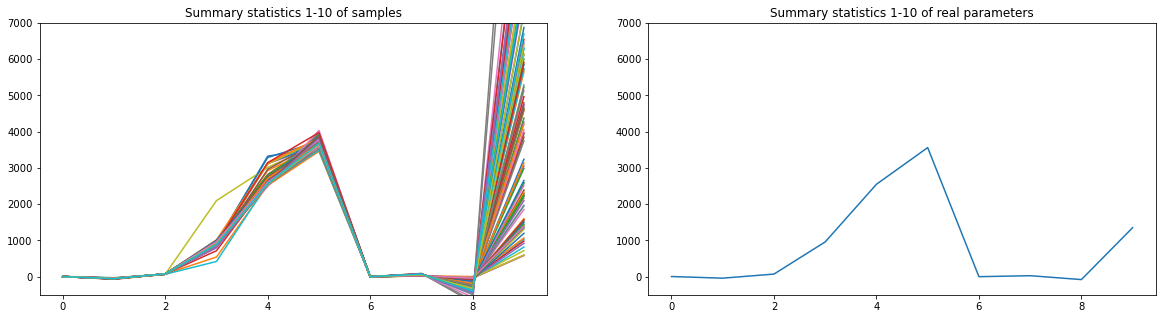

In [44]:
import seaborn as sns
import matplotlib.gridspec as gridspec




fig = plt.figure(figsize=(20,5))

gs = gridspec.GridSpec(nrows=1, ncols=2)
ax0 = fig.add_subplot(gs[0, 0])
ax1 = fig.add_subplot(gs[0, 1])

for sample in s_x:
    
    #assert torch.equal(sample, s_real[0])
    ax0.plot(sample.detach().numpy()[:10])
    ax0.set_title('Summary statistics 1-10 of samples')
    ax0.set(ylim=(-500, 7000))
 

ax1.plot(s_real[0][:10])
ax1.set_title('Summary statistics 1-10 of real parameters')
ax1.set(ylim=(-500, 7000))

plt.savefig('summary_stats1')

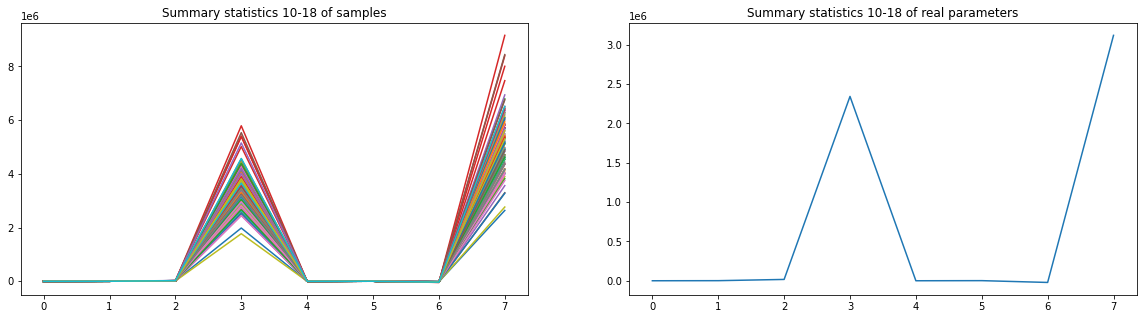

In [45]:
fig = plt.figure(figsize=(20,5))

gs = gridspec.GridSpec(nrows=1, ncols=2)
ax0 = fig.add_subplot(gs[0, 0])
ax1 = fig.add_subplot(gs[0, 1])

for sample in s_x:
    
    #assert torch.equal(sample, s_real[0])
    ax0.plot(sample.detach().numpy()[10:])
    ax0.set_title('Summary statistics 10-18 of samples')
    #ax0.set(ylim=(-500, 7000))
 

ax1.plot(s_real[0][10:])
ax1.set_title('Summary statistics 10-18 of real parameters')
#ax1.set(ylim=(-500, 7000))
  
plt.savefig('summary_stats2')

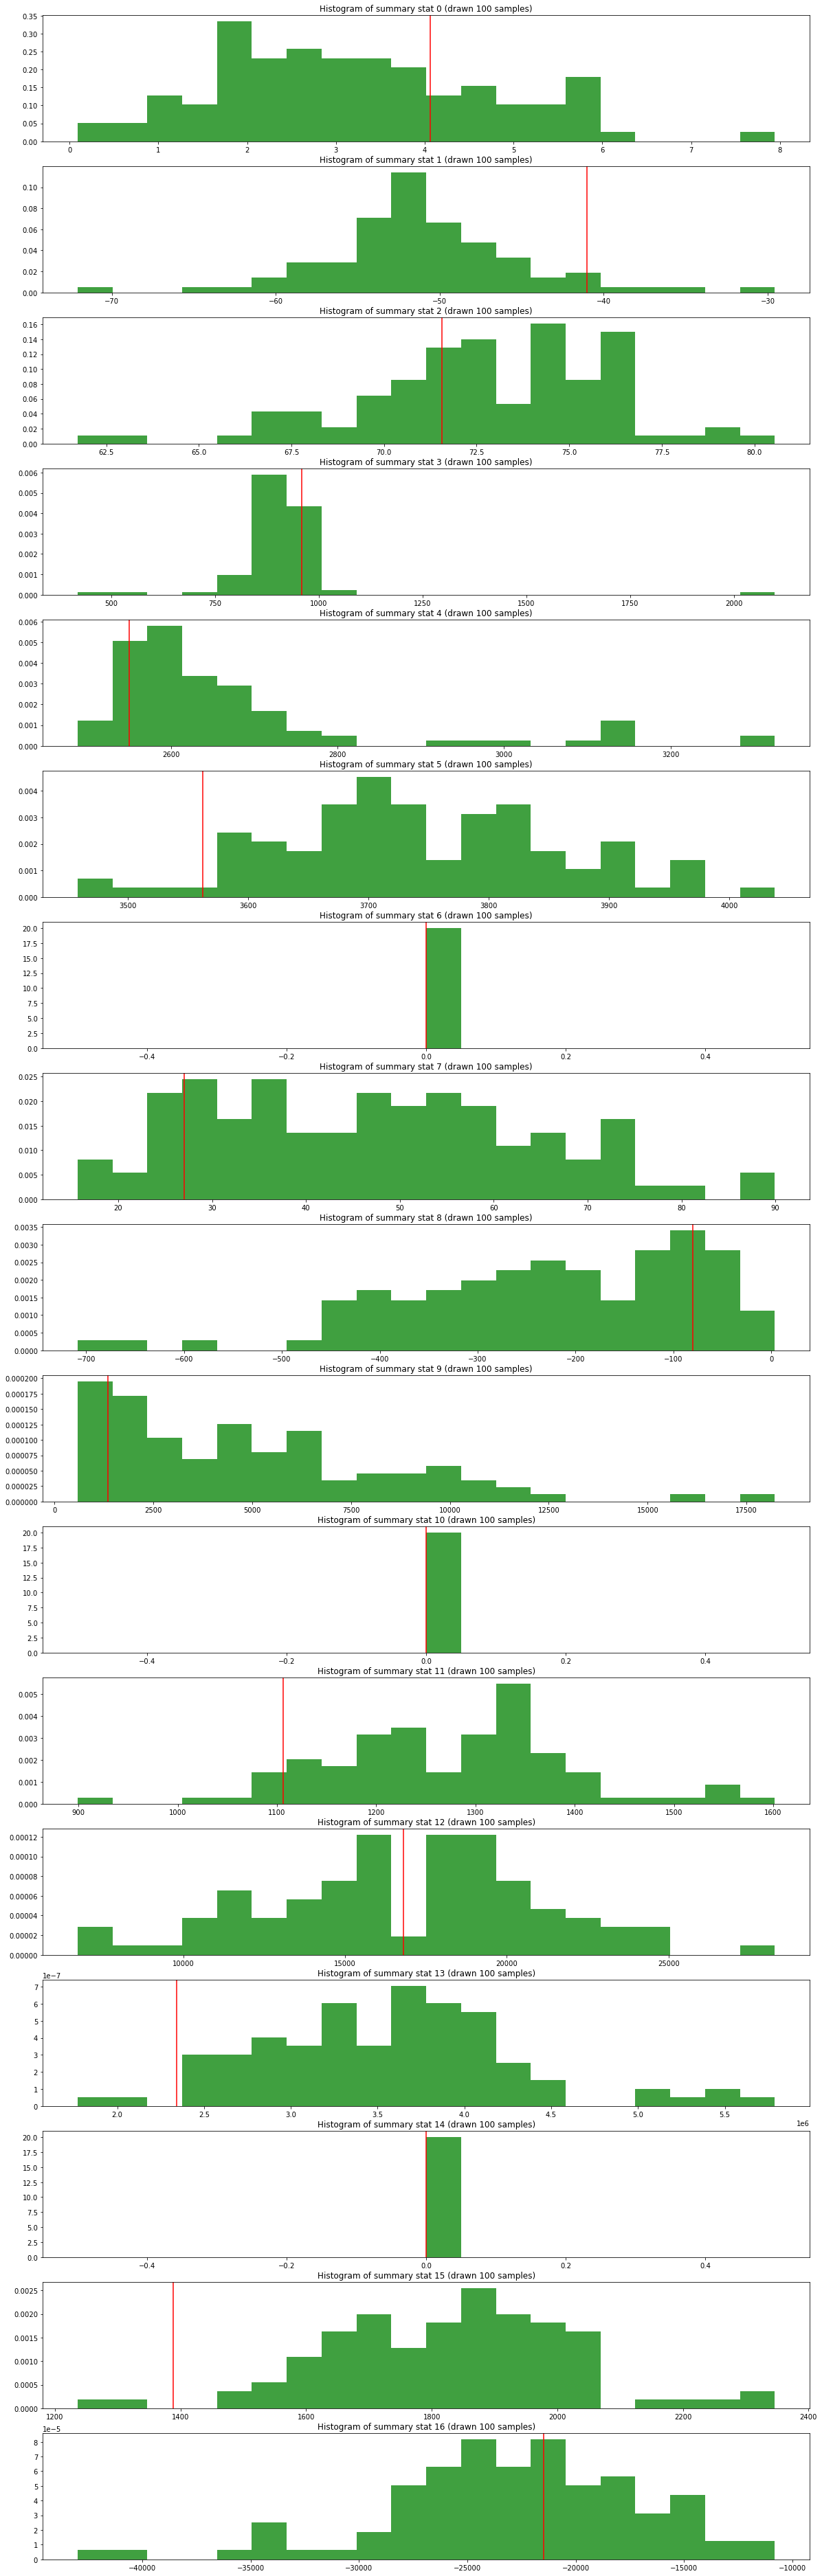

In [50]:
import math
import numpy as np

fig = plt.figure(figsize=(20,400))

gs = gridspec.GridSpec(nrows=len(s_x)-1, ncols=1)




for i in range(len(s_x[0])-1):
    
    globals()['ax%s' % i] = fig.add_subplot(gs[i])

    globals()['sum_stats%s' % i] = []

    for j in range(len(s_x)-1):
        globals()['sum_stats%s' % i].append(s_x[j][i])



    globals()['ax%s' % i].hist(globals()['sum_stats%s' % i], bins=20, density=True, facecolor='g', alpha=0.75, histtype='barstacked')
    globals()['ax%s' % i].set_title('Histogram of summary stat {} (drawn 100 samples)'.format(i))
    #ax0.set(ylim=(-500, 7000))


    globals()['ax%s' % i].axvline(s_real[0][i], color='red')




plt.savefig('Histograms.png')


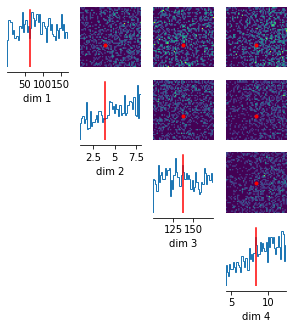

In [14]:
true_params = torch.Tensor([63.53, 3.85, 137.12, 8.33])




fig, axes = analysis.pairplot(samples,
                           #limits=[[.5,80], [1e-4,15.]],
                           #ticks=[[.5,80], [1e-4,15.]],
                           figsize=(5,5),
                           points=true_params,
                           points_offdiag={'markersize': 6},
                           points_colors='r');

In [81]:
%load_ext autoreload
%autoreload 2

import os


os.chdir('/home/kathi/Documents/Master_thesis/code/eeg_sbi')
from dataloads_storage import write_to_file

file_writer = write_to_file.WriteToFile(experiment='ERP_results')

file_writer.save_posterior(posterior)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
/home/kathi/Documents/Master_thesis/code/eeg_sbi
/home/kathi/Documents/Master_thesis/code/eeg_sbi


In [83]:
print(file_writer.date)

posterior =torch.load('results/{}{}/posterior.pt'.format(file_writer.experiment, file_writer.date))



10-29-2021_23:17:39


In [ ]:
import sys, os, datetime

path_parent = os.path.dirname(os.getcwd())
fig.savefig(str(path_parent)+'/eeg_sbi/results/fig_result_'+datetime.datetime.now().strftime("%m%d%Y_%H:%M:%S")+'.pdf')

path_parent = os.path.dirname(os.getcwd())

def create_file(file_name):
    print(path_parent)
    os.chdir(str(path_parent)+'/eeg_sbi/results')
    os.system('touch ' + file_name)
   
 
create_file('metadata'+datetime.datetime.now().strftime("%m%d%Y_%H:%M:%S"))

def write_data_in_file(file_name):
    os.chdir(str(path_parent)+'/eeg_sbi/results')
    
    with open(file_name, 'w') as fd:
        fd.write('#' * ( 16)) 
        fd.write('\n# parameters: ' + 't_evdist_1, sigma_t_evdist_1, t_evprox_2, sigma_t_evprox_2')
        fd.write('\n# priors: ' + str(prior))
        fd.write('\n# number of simulations: ' + str(number_simulations))
        fd.write('\n# posterior: ' + str(posterior))
        fd.write('\n# true parameters: ' + str(true_params))
        fd.write('\n# Created at: ' + datetime.datetime.today().strftime('%d %b %Y') + '\n')
        fd.write('#' * (16))

        
        os.chdir(path_parent)


write_data_in_file('metadata'+datetime.datetime.now().strftime("%m%d%Y_%H:%M:%S"))